## **데이터 불러오기**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%%capture 
!pip install -U pandas-profiling
!pip install wordcloud

In [3]:
# Google Drive 연동

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/My Drive/project6_cp/complaints_2021_ca.csv')

In [ ]:
df.head(3)

Date received  ... Complaint ID
0      12/01/21  ...      4966475
1      10/08/21  ...      4792654
2      12/08/21  ...      4989948

[3 rows x 18 columns]

In [ ]:
df.tail(3)

Date received  ... Complaint ID
25123      11/21/21  ...      4932847
25124      11/22/21  ...      4937389
25125      10/20/21  ...      4828908

[3 rows x 18 columns]

## **EDA**

In [ ]:
import pandas_profiling
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.shape

(25126, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25126 entries, 0 to 25125
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date received                 25126 non-null  object 
 1   Product                       25126 non-null  object 
 2   Sub-product                   25126 non-null  object 
 3   Issue                         25126 non-null  object 
 4   Sub-issue                     25126 non-null  object 
 5   Consumer complaint narrative  25126 non-null  object 
 6   Company public response       25126 non-null  object 
 7   Company                       25126 non-null  object 
 8   State                         25126 non-null  object 
 9   ZIP code                      25126 non-null  object 
 10  Tags                          25126 non-null  object 
 11  Consumer consent provided?    25126 non-null  object 
 12  Submitted via                 25126 non-null  object 
 13  D

In [5]:
# 필요없는 columns 제거

df_new = df[['Product','Consumer complaint narrative']]

In [ ]:
product_unique = df_new['Product'].unique()
product_unique.sort()
product_unique

array(['Checking or savings account', 'Credit card or prepaid card',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Debt collection',
       'Money transfer, virtual currency, or money service', 'Mortgage',
       'Payday loan, title loan, or personal loan', 'Student loan',
       'Vehicle loan or lease'], dtype=object)

In [ ]:
# label 분포 확인하기

df_new['Product'].value_counts(normalize=True)

Credit reporting, credit repair services, or other personal consumer reports    0.503502
Debt collection                                                                 0.147218
Credit card or prepaid card                                                     0.102205
Mortgage                                                                        0.089031
Checking or savings account                                                     0.074863
Money transfer, virtual currency, or money service                              0.044098
Vehicle loan or lease                                                           0.018387
Payday loan, title loan, or personal loan                                       0.012537
Student loan                                                                    0.008159
Name: Product, dtype: float64

In [ ]:
df_new_product = df_new['Product'].value_counts()
df_new_product

Credit reporting, credit repair services, or other personal consumer reports    12651
Debt collection                                                                  3699
Credit card or prepaid card                                                      2568
Mortgage                                                                         2237
Checking or savings account                                                      1881
Money transfer, virtual currency, or money service                               1108
Vehicle loan or lease                                                             462
Payday loan, title loan, or personal loan                                         315
Student loan                                                                      205
Name: Product, dtype: int64

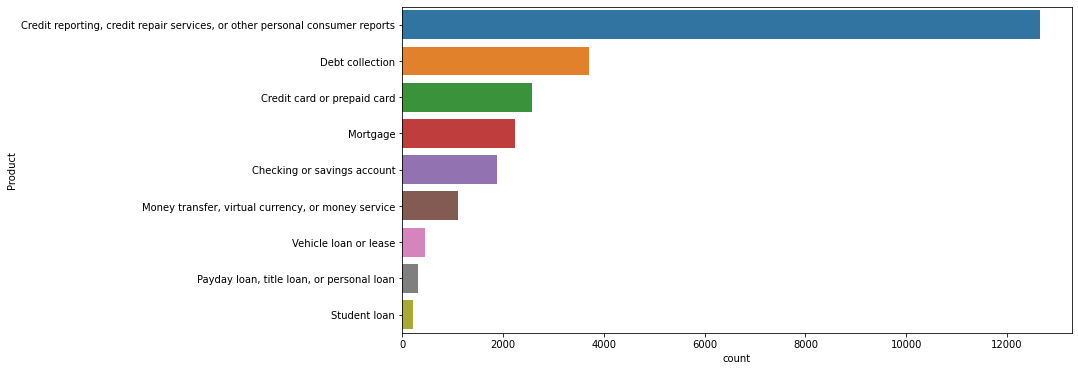

In [ ]:
%matplotlib inline

plt.figure(figsize=(12, 6))
sns.countplot(y='Product', data=df_new, order = df_new['Product'].value_counts().index, orient='h')

plt.show();

In [ ]:
# 각 고객 불만설명 텍스트 길이 분포 확인하기

df_new_len = df_new['Consumer complaint narrative'].apply(len)
df_new_len

0         394
1        1472
2        1637
3         304
4        5951
         ... 
25121     194
25122     237
25123    1679
25124     724
25125     184
Name: Consumer complaint narrative, Length: 25126, dtype: int64

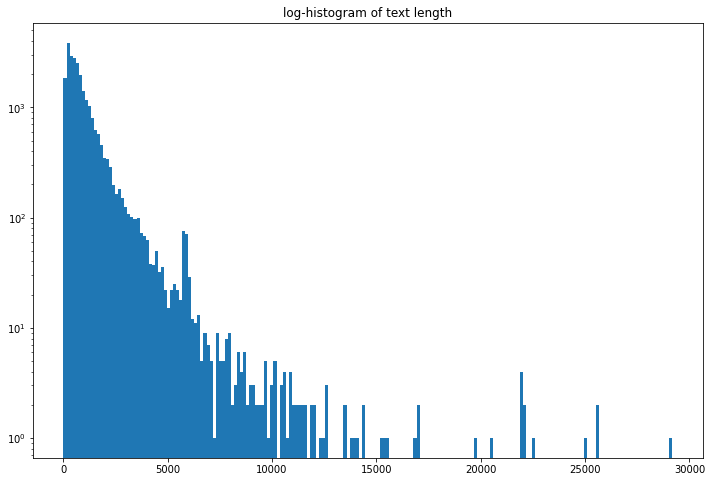

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(df_new_len, bins=200)
plt.yscale('log', nonposy='clip')
plt.title('log-histogram of text length');

In [ ]:
print(f'텍스트 길이 최대값: {np.max(df_new_len)}')
print(f'텍스트 길이 최소값: {np.min(df_new_len)}')
print(f'텍스트 길이 중간값: {np.median(df_new_len)}')
print(f'텍스트 길이 평균: {np.mean(df_new_len)}')
print(f'텍스트 길이 표준편차: {np.std(df_new_len)}')

텍스트 길이 최대값: 29174
텍스트 길이 최소값: 9
텍스트 길이 중간값: 660.0
텍스트 길이 평균: 1018.1209504099339
텍스트 길이 표준편차: 1297.8962995260904


In [ ]:
# 각 고객 불만설명 텍스트 하나당 갖고 있는 단어 갯수 분포 확인하기

df_new_words = df_new['Consumer complaint narrative'].apply(lambda x:len(x.split(' ')))
df_new_words

0          65
1         264
2         289
3          56
4        1091
         ... 
25121      40
25122      35
25123     284
25124     130
25125      30
Name: Consumer complaint narrative, Length: 25126, dtype: int64

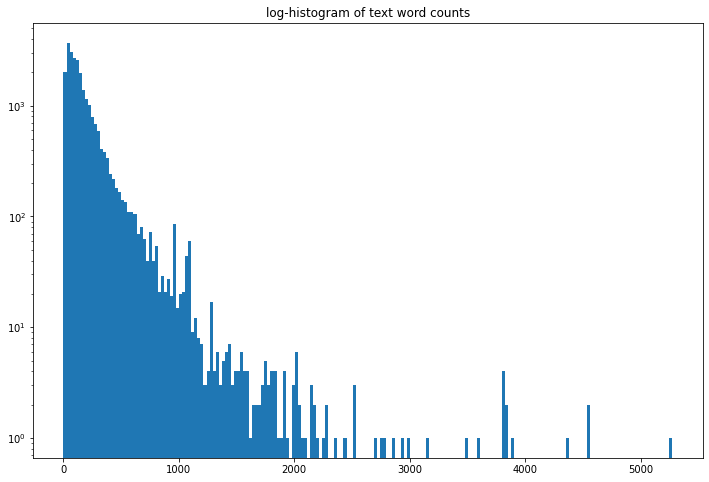

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(df_new_words, bins=200)
plt.yscale('log', nonposy='clip')
plt.title('log-histogram of text word counts');

In [ ]:
print(f'텍스트 하나당 단어 갯수 최대값: {np.max(df_new_words)}')
print(f'텍스트 하나당 단어 갯수 최소값: {np.min(df_new_words)}')
print(f'텍스트 하나당 단어 갯수 중간값: {np.median(df_new_words)}')
print(f'텍스트 하나당 단어 갯수 평균: {np.mean(df_new_words)}')
print(f'텍스트 하나당 단어 갯수 표준편차: {np.std(df_new_words)}')

텍스트 하나당 단어 갯수 최대값: 5271
텍스트 하나당 단어 갯수 최소값: 2
텍스트 하나당 단어 갯수 중간값: 119.0
텍스트 하나당 단어 갯수 평균: 183.3324444798217
텍스트 하나당 단어 갯수 표준편차: 232.06268984882004


In [6]:
# 고객 불만설명에 가장 많이 사용된 단어 확인하기

from wordcloud import WordCloud

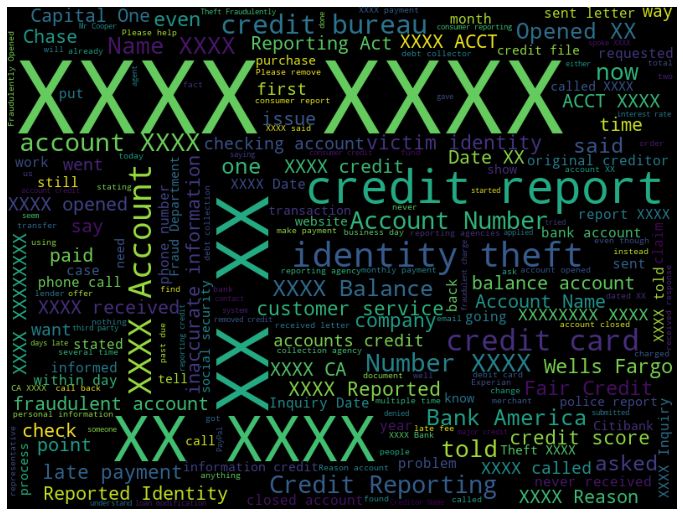

In [ ]:
cloud = WordCloud(width=800, height=600).generate(" ".join(df_new['Consumer complaint narrative']))
plt.figure(figsize=(12,10))
plt.imshow(cloud)
plt.axis('off');

In [ ]:
df_new['Consumer complaint narrative'][0]

'This is XXXX XXXX XXXX, who is submitting this CFPB complaint myself. These accounts are reporting late as reported in Transunion. Lets correct this immediately. Transunion is required to verify for themselves, but they failed to neither verify nor update me about these complaints. Please update or remove the late payments from these accounts. \n\n( XXXX XXXX XXXX, XXXX XXXX XXXX, XXXX  XXXX )'

In [ ]:
df_new['Consumer complaint narrative'][1]   

'I am a XXXX XXXX worker, and work at XXXX XXXX. \nDuring Covid, I was marked late for XX/XX/XXXX, for my Comenity and Express cards Comenity Bank Express card : XXXX and Victoria Secret Card : XXXX. \nI had over $ XXXX in my checking account to make the payments on these, however I came down with XXXX  and the rest of my family was XXXX  as well. \n\nI was in no mental and physical shape to attend to my mail. I was sure that I had made a payment online, but apparently Comenity claims nothing was received. \nAfter finding out I was marked late checked the Comenitys website which said I would only be marked late if payments werent received for 60 days, however I was still marked late despite not being 60 days late. \n\nI am trying to apply for a mortgage and these late payments have destroyed my chances. Im a loyal and happy Comenity customer, Ive read Comenity has made adjustments for people affected by Covid and I hope that Comenity can remove the XX/XX/XXXX, late payments off BOTH my

In [ ]:
df_new['Consumer complaint narrative'][500]   ## 발견한 문자: X , / : . \n $ { } ( ) #

'This is XXXX XXXX who is submitting this CFPB complaint myself. I sent letters to Experian Credit Bureau the date of the last letter was on XX/XX/XXXX. And now we are in the month of XX/XX/XXXX and still nothing from them. That means Experian has NOT complied with the Fair Credit Reporting Act law and continued to report inaccurate information on my credit report. REMOVE THESE FOLLOWING ACCOUNTS COMPLETELY FROM MY CREDIT REPORT : ( XXXX XXXX XXXX  XXXX, XXXX XXXX, XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX : XX/XX/XXXX Reference # : XXXX, XXXX XXXX XXXX XXXX Filed/Reported : XX/XX/XXXX Reference # : XXXX )'

In [ ]:
df_new['Consumer complaint narrative'][99]

"I have sent letters to Equifax, XXXX and XXXX about these false negative accounts on my credit report last XX/XX/2021. They sent my documents and letters on my behalf, and it was determined that the credit furnisher was verified. These report is misleading and suspicious. Section 611 ( a ), It states that failure to investigate these items within XXXX  days gives a reason to immediately remove those items from my credit report. Its been over XXXXdays so they should be deleted promptly. I demand that these accounts be deleted immediately or I will file for litigation due to the stress you have caused me. My information was also impacted by the Equifax data breach and may have gotten into the hands of the wrong person. These report is misleading and suspicious. Below are the federal law violations that these companies are committing! If this doesn't get resolved I will seek litigation, and charge {$1000.00} per violation. \n\nHowever All Under penalty of perjury, I swear this account is

In [ ]:
print(df_new.loc[df_new['Consumer complaint narrative'].str.contains('XXXXdays')])

                                                 Product                       Consumer complaint narrative
99     Credit reporting, credit repair services, or o...  I have sent letters to Equifax, XXXX and XXXX ...
3478   Credit reporting, credit repair services, or o...  I have sent letters to XXXX, XXXX and TransUni...
5146   Credit reporting, credit repair services, or o...  Hi XXXX has a low and unfair credit number for...
12860  Credit reporting, credit repair services, or o...  I received a copy of my Trans Union credit rep...
23825  Credit reporting, credit repair services, or o...  Hi XXXX has a low and unfair credit number for...


In [ ]:
# 각 고객 불만사항 마다 대문자 포함 여부 확인하기

capital = np.mean(df_new['Consumer complaint narrative'].apply(lambda x: max([i.isupper() for i in x])))
print(f'대문자가 포함된 불만사항 비율: {capital*100:.2f}%')

대문자가 포함된 불만사항 비율: 99.67%


In [ ]:
# 각 고객 불만사항 마다 구두점, 특수문자 포함 여부 확인하기

qmark = np.mean(df_new['Consumer complaint narrative'].apply(lambda x: '?' in x))
print(f'물음표가 포함된 불만사항 비율: {qmark*100:.2f}%')

comma = np.mean(df_new['Consumer complaint narrative'].apply(lambda x: ',' in x))
print(f'쉼표가 포함된 불만사항 비율: {comma*100:.2f}%')

close = np.mean(df_new['Consumer complaint narrative'].apply(lambda x: '.' in x))
print(f'마침표가 포함된 불만사항 비율: {close*100:.2f}%')

enter = np.mean(df_new['Consumer complaint narrative'].apply(lambda x: '\n' in x))
print(f'\\n가 포함된 불만사항 비율: {enter*100:.2f}%')

xchar = np.mean(df_new['Consumer complaint narrative'].apply(lambda x: 'X' in x))
print(f'문자 X 포함된 불만사항 비율: {xchar*100:.2f}%')

물음표가 포함된 불만사항 비율: 7.58%
쉼표가 포함된 불만사항 비율: 69.12%
마침표가 포함된 불만사항 비율: 96.92%
\n가 포함된 불만사항 비율: 39.48%
문자 X 포함된 불만사항 비율: 77.98%


## **데이터 전처리**

### **1) 라벨 인코딩**

In [7]:
%%capture 
!pip install squarify

In [8]:
from sklearn.preprocessing import LabelEncoder
import re

import squarify

In [9]:
# LabelEncoder를 사용하여 label 전처리
encoded = LabelEncoder()
df_new['Product'] = encoded.fit_transform(df_new['Product'])

# 변환된 label classes 확인
print(encoded.classes_)

['Checking or savings account' 'Credit card or prepaid card'
 'Credit reporting, credit repair services, or other personal consumer reports'
 'Debt collection' 'Money transfer, virtual currency, or money service'
 'Mortgage' 'Payday loan, title loan, or personal loan' 'Student loan'
 'Vehicle loan or lease']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


① 대소문자 갯수 파악 -> 통일 <br>

② 구두점, 특수문자 등 필요없는 문자 포함 여부 -> 정규표현식 통해 제거<br>

③ the, i, and, of 등 의미없는 단어 포함 여부 파악 -> 불용어 처리<br>

④ - 1 모든 문서에 많이 등장하는 단어는 빈도만 높고 통찰력, 변별력 즉 큰 의미가 없을 거라서 제외<br>
④ - 2 너무 조금 등장하는 단어는 이상치같은 느낌(오타일 가능성도 있고 뭐 등등)이라서 큰 의미가 없을거라서 제외<br>
-> 통계적 트리밍

⑤ 어간 추출(Stemming)
ㄴ -ed, -s, -es, -ing
ㄴ wolves -> wolv

⑥ 표제어 추출(Lemmatization) 
ㄴ 원형으로 돌려줌.
ㄴ연산량이 많다. 처리 속도가 느려서 시간이 오래 걸린다.

### **2) 텍스트 전처리 연습**

1 특수문자 제거 => 정규식 <br>
2 문자 X 제거 => 정규식 <br>
3 대소문자 통일 => lower().split() => 임시 토큰화 <br>

In [ ]:
ex0 = 'This is X XX XXX XXXX'
ex1 = 'This is XXXX XXXX XXXX, who is submitting this CFPB complaint myself. These accounts are reporting late as reported in Transunion. Lets correct this immediately. Transunion is required to verify for themselves, but they failed to neither verify nor update me about these complaints. Please update or remove the late payments from these accounts. \n\n( XXXX XXXX XXXX, XXXX XXXX XXXX, XXXX  XXXX )'
ex2 = 'I am a XXXX XXXX worker, and work at XXXX XXXX. \nDuring Covid, I was marked late for XX/XX/XXXX, for my Comenity and Express cards Comenity Bank Express card : XXXX and Victoria Secret Card : XXXX. \nI had over $ XXXX in my checking account to make the payments on these, however I came down with XXXX  and the rest of my family was XXXX  as well. \n\nI was in no mental and physical shape to attend to my mail. I was sure that I had made a payment online, but apparently Comenity claims nothing was received. \nAfter finding out I was marked late checked the Comenitys website which said I would only be marked late if payments werent received for 60 days, however I was still marked late despite not being 60 days late. \n\nI am trying to apply for a mortgage and these late payments have destroyed my chances. Im a loyal and happy Comenity customer, Ive read Comenity has made adjustments for people affected by Covid and I hope that Comenity can remove the XX/XX/XXXX, late payments off BOTH my accounts, given that Im a XXXX XXXX. \n\nAccounts information : Account information number 1 : Account name : COMENITY BANK/EXPRESS Account number : XXXX Balance : {$83.00} Date opened : XX/XX/XXXX Account status : Open Account information number 2 : Account name : COMENITYBANK/VICTORIA Account number : XXXX Balance : {$1500.00} Date opened : XXXX XXXX, XXXX Account status : Open Please see attached my XXXX XXXX ID. \n\nSolution : remove XXXX late payments XXXX from my accounts.'
ex3 = 'Its been over XXXXdays so they should be deleted promptly.'

In [ ]:
# 영어를 제외하고 나머지는 모두 제거

ex2_pp = re.sub("[^a-zA-Z ]","",ex2)
ex2_pp

'I am a XXXX XXXX worker and work at XXXX XXXX During Covid I was marked late for XXXXXXXX for my Comenity and Express cards Comenity Bank Express card  XXXX and Victoria Secret Card  XXXX I had over  XXXX in my checking account to make the payments on these however I came down with XXXX  and the rest of my family was XXXX  as well I was in no mental and physical shape to attend to my mail I was sure that I had made a payment online but apparently Comenity claims nothing was received After finding out I was marked late checked the Comenitys website which said I would only be marked late if payments werent received for  days however I was still marked late despite not being  days late I am trying to apply for a mortgage and these late payments have destroyed my chances Im a loyal and happy Comenity customer Ive read Comenity has made adjustments for people affected by Covid and I hope that Comenity can remove the XXXXXXXX late payments off BOTH my accounts given that Im a XXXX XXXX Acco

In [ ]:
# 연속된 X문자 제거하기

ex2_pp = re.sub("XX+ ","",ex2_pp)
ex2_pp

'I am a worker and work at During Covid I was marked late for for my Comenity and Express cards Comenity Bank Express card  and Victoria Secret Card  I had over  in my checking account to make the payments on these however I came down with  and the rest of my family was  as well I was in no mental and physical shape to attend to my mail I was sure that I had made a payment online but apparently Comenity claims nothing was received After finding out I was marked late checked the Comenitys website which said I would only be marked late if payments werent received for  days however I was still marked late despite not being  days late I am trying to apply for a mortgage and these late payments have destroyed my chances Im a loyal and happy Comenity customer Ive read Comenity has made adjustments for people affected by Covid and I hope that Comenity can remove the late payments off BOTH my accounts given that Im a Accounts information  Account information number   Account name  COMENITY BAN

In [ ]:
# X 문자 없애기 연습(1)

regex = re.compile("X+")   # X 1 or more previous char
regex = re.compile("XX+")  # X 2 or more previois char
mo = regex.findall(ex2)

print(mo)
# print(len(mo))  # 29

# search 메소드 사용했을 때,
# if mo != None:
#     print(mo.group()) 

['XXXX', 'XXXX', 'XXXX', 'XXXX', 'XX', 'XX', 'XXXX', 'XXXX', 'XXXX', 'XXXX', 'XXXX', 'XXXX', 'XX', 'XX', 'XXXX', 'XXXX', 'XXXX', 'XXXX', 'XX', 'XX', 'XXXX', 'XXXX', 'XXXX', 'XXXX', 'XXXX', 'XXXX', 'XXXX', 'XXXX', 'XXXX']


In [ ]:
# X 문자 없애기 연습(2)

test = 'abbbsdfcdZZZZ11111)'
test1 = re.sub('(([a-zA-Z0-9])\\2{1,})', '', test) # 연속된 같은 문자 변환 (2개이상)
test2 = re.sub('(([a-zA-Z0-9])\\2{2,})', '', test) # 연속된 같은 문자 변환 (3개이상)
test3 = re.sub('(([a-zA-Z0-9])\\2{3,})', '', test) # 연속된 같은 문자 변환 (4개이상)
test4 = re.sub('(([a-zA-Z0-9])\\2{4,})', '', test) # 연속된 같은 문자 변환 (5개이상)

print(test1) 
print(test2)  
print(test3)
print(test4)

##### OUTPUT #####
# asdfcd)
# asdfcd)
# abbbsdfcd)
# abbbsdfcdZZZZ)

asdfcd)
asdfcd)
abbbsdfcd)
abbbsdfcdZZZZ)


In [ ]:
# X 문자 없애기 연습(2)
test_pp = re.sub('((X)\\2{2,}) ', '', ex2_pp) # 연속된 같은 문자 변환 (2개이상)
test_pp 

'I am a worker and work at During Covid I was marked late for for my Comenity and Express cards Comenity Bank Express card  and Victoria Secret Card  I had over  in my checking account to make the payments on these however I came down with  and the rest of my family was  as well I was in no mental and physical shape to attend to my mail I was sure that I had made a payment online but apparently Comenity claims nothing was received After finding out I was marked late checked the Comenitys website which said I would only be marked late if payments werent received for  days however I was still marked late despite not being  days late I am trying to apply for a mortgage and these late payments have destroyed my chances Im a loyal and happy Comenity customer Ive read Comenity has made adjustments for people affected by Covid and I hope that Comenity can remove the late payments off BOTH my accounts given that Im a Accounts information  Account information number   Account name  COMENITY BAN

In [ ]:
# 소문자로 통일, 임시토큰화

ex2_pp_words = ex2_pp.lower().split()
print(ex2_pp_words)

['i', 'am', 'a', 'worker', 'and', 'work', 'at', 'during', 'covid', 'i', 'was', 'marked', 'late', 'for', 'for', 'my', 'comenity', 'and', 'express', 'cards', 'comenity', 'bank', 'express', 'card', 'and', 'victoria', 'secret', 'card', 'i', 'had', 'over', 'in', 'my', 'checking', 'account', 'to', 'make', 'the', 'payments', 'on', 'these', 'however', 'i', 'came', 'down', 'with', 'and', 'the', 'rest', 'of', 'my', 'family', 'was', 'as', 'well', 'i', 'was', 'in', 'no', 'mental', 'and', 'physical', 'shape', 'to', 'attend', 'to', 'my', 'mail', 'i', 'was', 'sure', 'that', 'i', 'had', 'made', 'a', 'payment', 'online', 'but', 'apparently', 'comenity', 'claims', 'nothing', 'was', 'received', 'after', 'finding', 'out', 'i', 'was', 'marked', 'late', 'checked', 'the', 'comenitys', 'website', 'which', 'said', 'i', 'would', 'only', 'be', 'marked', 'late', 'if', 'payments', 'werent', 'received', 'for', '60', 'days', 'however', 'i', 'was', 'still', 'marked', 'late', 'despite', 'not', 'being', '60', 'days', '

### **3) 불용어 처리 & Lemmatization**
4 불용어 처리 & 통계적 트리밍=> <br>
5 Lemmatization => <br>

In [ ]:
# 불용어 처리: nltk (nltk 불용어 리스트 데이터를 설치)

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

print(stopwords.words('english'))
# len(stopwords.words('english'))  #179

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
# 불용어 처리: spacy (spacy 설치)

import spacy

en = spacy.load('en_core_web_sm')
stopwords = en.Defaults.stop_words

print(stopwords)
# len(stopwords)   #326

{'became', 'whence', 'eleven', 'thereby', 'why', 'formerly', 'same', 'under', 'upon', 'below', "'s", 'then', 'no', 'however', 'herself', 'such', 'these', 'as', 'her', 'everywhere', 'everything', 'please', 'per', 'he', 'an', 'to', '’m', 'also', "'ve", 'yet', '‘ll', 'am', 'himself', 'unless', 'but', 'nine', 'someone', 'various', 'eight', 'least', 'everyone', 'yourself', '‘m', 'many', "'m", 'call', 'empty', 'than', 'sometime', 'from', 'whom', 'have', 'nor', 'anywhere', 'among', 'often', 'which', '’ve', 'she', 'they', 'should', 'that', 'become', 'former', 'even', 'quite', 'amongst', 'amount', 'out', 'him', '’ll', 'few', 'put', 'regarding', 'whither', 'indeed', 'yourselves', 'none', 'above', 'a', 'anything', 'what', 'of', 'less', 'onto', 're', 'hers', 'being', 'must', 'for', 'were', 'except', 'down', 'toward', 'ca', 'six', 'not', 'fifty', 'therein', 'meanwhile', '’s', 'thence', 'perhaps', 'itself', '’re', 'give', 'ourselves', 'whenever', 'beyond', 'off', 'there', 'into', 'when', 'their', 'a

In [ ]:
# Lemmatization

text777 = "The social wolf. Wolves are complex."
text888 = "I was reading the paper worker works."

doc = en(text888)

lemmas = []
for token in doc:

  # is_stop : 불용어 리스트 포함여부
  # is_punct : 문장부호 인지아닌지
  # pos_ : 품사 / 'PRON' 대명사는 표제어추출이 그대로 -PRON- 으로 추출됨

  if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
    lemmas.append(token.lemma_)
    
lemmas

['read', 'paper', 'worker', 'work']

### **4) 텍스트 전처리 함수 만들기**

### PART 1. 불용어 처리 일단 제외하고 만들기

In [ ]:
# 전처리 함수 직접 구축 후, split() 통해서 임시토큰화 (불용어 처리 제외 ver.)

def pp_dummy(text):

  # 영어, 숫자가 아닌 특수문자 제거
  complaints = re.sub("[^a-zA-Z0-9 ]","",text)

  # 연속된 X 문자 제거
  complaints = re.sub("XX+","",complaints)

  # 소문자로 통일
  words = complaints.lower().split()

  return words

In [ ]:
df_new['words'] = df_new['Consumer complaint narrative'].apply(pp_dummy)
df_new.head()

# df_new.drop(["words"], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_new['words'].apply(len)

0         51
1        222
2        274
3         56
4        955
        ... 
25121     40
25122     35
25123    276
25124    122
25125     30
Name: words, Length: 25126, dtype: int64

In [11]:
from collections import Counter

def word_count(docs):

    # 전체 코퍼스에서 단어 빈도 카운트
    word_counts = Counter()

    # 단어가 존재하는 문서의 빈도 카운트, 단어가 한 번 이상 존재하면 +1
    word_in_docs = Counter()

    # 전체 문서의 갯수
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        word_in_docs.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # 단어의 순위
    # method='first': 같은 값의 경우 먼저나온 요소를 우선
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # 코퍼스 내 단어의 비율
    wc['percent'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')

    # 누적 비율
    # cumsum() : cumulative sum
    wc['cul_percent'] = wc['percent'].cumsum()

    temp2 = zip(word_in_docs.keys(), word_in_docs.values())
    ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])
    wc = ac.merge(wc, on='word')
    
    # 전체 문서 중 존재하는 비율
    wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [ ]:
wc = word_count(df_new['words'])
wc.head(20)

word  word_in_docs   count  ...   percent  cul_percent  word_in_docs_percent
36       the         21365  184078  ...  0.043208     0.043208              0.850314
87         i         22220  156225  ...  0.036670     0.079879              0.884343
9         to         21959  152249  ...  0.035737     0.115616              0.873955
121      and         21870  124884  ...  0.029314     0.144930              0.870413
70        my         21977   99693  ...  0.023401     0.168331              0.874672
116        a         18871   88365  ...  0.020742     0.189072              0.751055
44        of         18196   81673  ...  0.019171     0.208243              0.724190
48      that         16707   64771  ...  0.015204     0.223447              0.664929
47        on         18124   56661  ...  0.013300     0.236747              0.721325
86       was         13249   51501  ...  0.012089     0.248836              0.527302
8       this         15996   50690  ...  0.011898     0.260734              0.636631
16        in         15443   49097  ...  0.011524     0.272258              0.614622
22        is         15779   46632  ...  0.010946     0.283204              0.627995
125      not         16428   45640  ...  0.010713     0.293917              0.653825
83      have         16763   44162  ...  0.010366     0.304283              0.667158
34      they         13149   43688  ...  0.010255     0.314538              0.523322
186   credit         15626   42744  ...  0.010033     0.324571              0.621906
46   account         11730   42699  ...  0.010023     0.334594              0.466847
21        me         13599   39711  ...  0.009321     0.343915              0.541232
15       for         13885   39269  ...  0.009218     0.353133              0.552615

[20 rows x 7 columns]

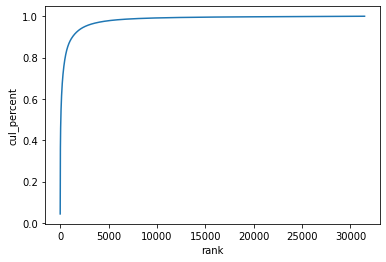

In [ ]:
# 단어의 누적 분포 그래프 그리기

sns.lineplot(x='rank', y='cul_percent', data=wc);

In [ ]:
wc[wc['rank'] <= 1000]['cul_percent'].max()

0.8784684062548558

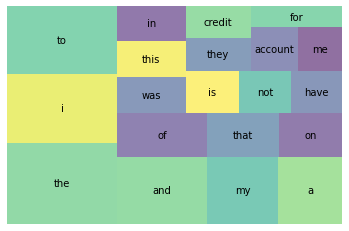

In [ ]:
# Squarify 라이브러리를 사용 -> 등장 비율 상위 20개 단어의 결과를 시각화

wc_top20 = wc[wc['rank'] <= 20]
squarify.plot(sizes=wc_top20['percent'], label=wc_top20['word'], alpha=0.6)
plt.axis('off')
plt.show()

# 대부분 불용어인 것을 확인 할 수 있다.



---


### split() 말고 spaCy Tokenizer 통해서 토큰화 해보려고 했는데 연속된 문자 제거하는 게 계속 실패하고 있어서 일단 스킵

In [ ]:
# spacy Tokenizer 통해서 토큰화 (불용어 처리 제외 ver.)

from spacy.tokenizer import Tokenizer

# en = spacy.load('en_core_web_sm') ---> 위에서 이미 실행한 명령어
tokenizer = Tokenizer(en.vocab)

In [ ]:
# 토큰화를 위한 파이프라인 구성

tokens = []
regax = re.compile("((x)\\2{2,})")

for doc in tokenizer.pipe(df_new['Consumer complaint narrative']):
  doc_res = []
  for token in doc:
    token = token.text.lower()
    doc_tokens = re.sub(regax, "", token)
    # doc_tokens = re.sub(r"[^a-z0-9]", "", token)
    # doc_tokens = re.sub(r"[^a-z0-9]|[xx+ ]", "", token)
    # doc_tokens = re.sub(r"[xx+ ]", "", doc_tokens)
    doc_res.append(doc_tokens)
  tokens.append(doc_res)

df_new['tokens'] = tokens
df_new.head()

In [ ]:
# df_new.drop(["tokens"], axis=1, inplace=True)
df_new



---



### PART 2. 불용어 처리 포함해서 만들기

In [12]:
# 전처리 함수 직접 구축 후, split() 통해서 임시토큰화 -> 다시 join 붙여주기 (불용어 처리 포함 ver.)

def pp_real(text):

  # 영어가 아닌 모든 것(숫자,특수문자 등) 제거
  complaints = re.sub("[^a-zA-Z ]","",text)

  # 연속된 X 문자 제거
  complaints = re.sub("XX+","",complaints)

  # 소문자로 통일
  words = complaints.lower().split()

  # 불용어 제거 (spaCy)
  words = [x for x in words if not x in stopwords]
  clean_complaints = " ".join(words)

  # 표제어 처리 (spaCy)
  doc = en(clean_complaints)
  lemmas = []
  for token in doc:
    if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
      lemmas.append(token.lemma_)
  clean_complaints = " ".join(lemmas)
  
  # return words
  # return lemmas
  return clean_complaints

### Lemmatization 전

In [ ]:
df_new['words_real'] = df_new['Consumer complaint narrative'].apply(pp_real)
df_new.head()

In [ ]:
# df_new.drop(["words_real"], axis=1, inplace=True)

In [ ]:
# lemmatization 전

df_new['words_real'].apply(len)

0         23
1        114
2        130
3         25
4        412
        ... 
25121     13
25122     17
25123    123
25124     52
25125     16
Name: words_real, Length: 25126, dtype: int64

In [ ]:
# lemmatization 전

wc_real = word_count(df_new['words_real'])
wc_real.head(20)

word  word_in_docs  ...  cul_percent  word_in_docs_percent
31        account         11733  ...     0.023617              0.466966
139        credit         15628  ...     0.047196              0.621985
128        report         11019  ...     0.058762              0.438550
32    information          7976  ...     0.068193              0.317440
19           bank          4737  ...     0.075356              0.188530
24        payment          4508  ...     0.082282              0.179416
17      reporting          5480  ...     0.088831              0.218101
37           card          4321  ...     0.095137              0.171973
417          loan          3630  ...     0.101415              0.144472
7        accounts          5724  ...     0.107320              0.227812
72       received          6446  ...     0.113127              0.256547
445          told          4675  ...     0.118387              0.186062
233          time          5681  ...     0.123609              0.226100
1399         debt          3220  ...     0.128477              0.128154
113          sent          5597  ...     0.133274              0.222757
26         number          3953  ...     0.137929              0.157327
339        called          4782  ...     0.142563              0.190321
33        balance          3449  ...     0.147136              0.137268
23           days          4726  ...     0.151671              0.188092
466       company          4632  ...     0.156148              0.184351

[20 rows x 7 columns]

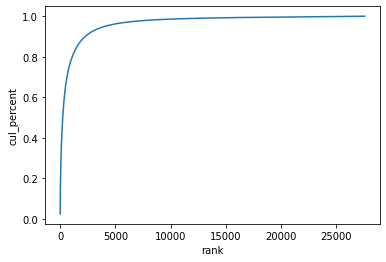

In [ ]:
# lemmatization 전
# 단어의 누적 분포 그래프 그리기

sns.lineplot(x='rank', y='cul_percent', data=wc_real);

In [ ]:
# lemmatization 전

wc_real[wc_real['rank'] <= 1000]['cul_percent'].max()

# wc_real[wc_real['rank'] <= 2000]['cul_percent'].max()    ## 0.886
# wc_real[wc_real['rank'] <= 2500]['cul_percent'].max()    ## 0.910
# wc_real[wc_real['rank'] <= 3000]['cul_percent'].max()    ## 0.927
# wc_real[wc_real['rank'] <= 4000]['cul_percent'].max()    ## 0.949
# wc_real[wc_real['rank'] <= 5000]['cul_percent'].max()    ## 0.962

0.7856378010035531

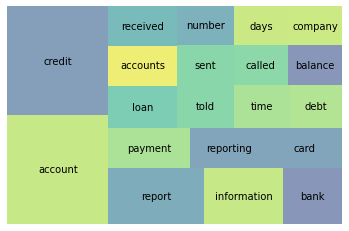

In [ ]:
# lemmatization 전
# Squarify 라이브러리를 사용 -> 등장 비율 상위 20개 단어의 결과를 시각화

wc_real_top20 = wc_real[wc_real['rank'] <= 20]
squarify.plot(sizes=wc_real_top20['percent'], label=wc_real_top20['word'], alpha=0.6)
plt.axis('off')
plt.show()

# 불용어들이 제거되니 의미있는 단어들을 발견할 수 있다.

In [ ]:
clean_complaint_narrative = []
for text in df_new['Consumer complaint narrative']:
  clean_complaint_narrative.append(pp_real(text))

# 전처리 함수를 거친 불만사항 99번째 데이터 확인
clean_complaint_narrative[99]

'sent letters equifax false negative accounts credit report sent documents letters behalf determined credit furnisher verified report misleading suspicious section states failure investigate items days gives reason immediately remove items credit report days deleted promptly demand accounts deleted immediately file litigation stress caused information impacted equifax data breach gotten hands wrong person report misleading suspicious federal law violations companies committing doesnt resolved seek litigation charge violation penalty perjury swear account false misleading usc method verification account violation reported valid evidence code e b code account violation reporting accurateunauthorizederroneous account result equifax data breach direct violation fcra reporting falsely code b exclusions consumer report account violation credit transaction supposed excluded consumer credit report social security card transactioncontacted creditoragency asked proof alleged debt specifically al

In [ ]:
# 원래 불만사항 99째 데이터 확인 비교
df_new['Consumer complaint narrative'][99]

"I have sent letters to Equifax, XXXX and XXXX about these false negative accounts on my credit report last XX/XX/2021. They sent my documents and letters on my behalf, and it was determined that the credit furnisher was verified. These report is misleading and suspicious. Section 611 ( a ), It states that failure to investigate these items within XXXX  days gives a reason to immediately remove those items from my credit report. Its been over XXXXdays so they should be deleted promptly. I demand that these accounts be deleted immediately or I will file for litigation due to the stress you have caused me. My information was also impacted by the Equifax data breach and may have gotten into the hands of the wrong person. These report is misleading and suspicious. Below are the federal law violations that these companies are committing! If this doesn't get resolved I will seek litigation, and charge {$1000.00} per violation. \n\nHowever All Under penalty of perjury, I swear this account is

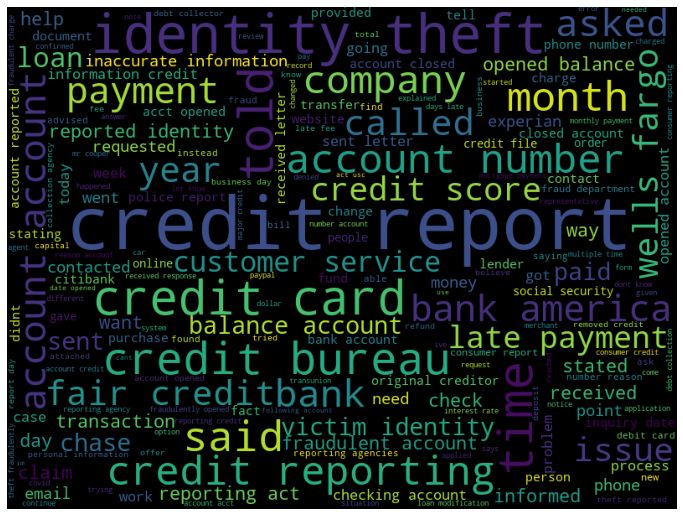

In [ ]:
# 고객 불만설명에 가장 많이 사용된 단어 확인하기 (불용어 제거후)

cloud = WordCloud(width=800, height=600).generate(" ".join(clean_complaint_narrative))
plt.figure(figsize=(12,10))
plt.imshow(cloud)
plt.axis('off');

In [ ]:
# X 문자 왜 보이지?? -----> xxxx2021 처럼 xxxx이 일반단어랑 붙어있는거는 안없어진거 같다.

# regex = re.compile("X+")   # X 1 or more previous char
regex = re.compile("XX+")  # X 2 or more previois char
# mo = regex.findall(clean_complaint_narrative)

xx_num = 0
for i in clean_complaint_narrative:
  mo = regex.findall(i)
  xx_num += len(mo)

print(xx_num)
# search 메소드 사용했을 때,
# if mo != None:
#     print(mo.group()) 

0


In [ ]:
# 지금까지 전처리한 데이터를 새로운 데이터프레임으로 저장해두기 (불용어 제거후)

df_clean = pd.DataFrame({'product':df_new['Product'], 'complaint':clean_complaint_narrative})
df_clean.head(3)

# len(df_clean)
# 25126

product                                          complaint
0        2  submitting cfpb complaint accounts reporting l...
1        3  worker work covid marked late comenity express...
2        2  unfortunately victim identity theft account cr...

In [ ]:
df_clean_original = df_clean.copy()

In [ ]:
df_clean_original.head(3)

product                                          complaint
0        2  submitting cfpb complaint accounts reporting l...
1        3  worker work covid marked late comenity express...
2        2  unfortunately victim identity theft account cr...

### Lemmatization 후

In [ ]:
# 문장으로 붙였을 때
df_new['words_real'] = df_new['Consumer complaint narrative'].apply(pp_real)
df_new.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Product  ...                                         words_real
0        2  ...  submit cfpb complaint account report late repo...
1        3  ...  worker work covid mark late comenity express c...
2        2  ...  unfortunately victim identity theft account cr...
3        2  ...  victim identity theft victim identity theft fi...
4        2  ...  account number correct inaccurate information ...

[5 rows x 3 columns]

In [ ]:
# 단어로 분리했을 때
df_new['words_real'] = df_new['Consumer complaint narrative'].apply(pp_real)
df_new.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Product  ...                                         words_real
0        2  ...  [submit, cfpb, complaint, account, report, lat...
1        3  ...  [worker, work, covid, mark, late, comenity, ex...
2        2  ...  [unfortunately, victim, identity, theft, accou...
3        2  ...  [victim, identity, theft, victim, identity, th...
4        2  ...  [account, number, correct, inaccurate, informa...

[5 rows x 3 columns]

In [ ]:
# df_new.drop(["words_real"], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# lemmatization 후

df_new['words_real'].apply(len)

0         23
1        114
2        130
3         25
4        412
        ... 
25121     13
25122     17
25123    123
25124     52
25125     16
Name: words_real, Length: 25126, dtype: int64

In [ ]:
# lemmatization 후

wc_real = word_count(df_new['words_real'])
wc_real.head(20)

word  word_in_docs  ...  cul_percent  word_in_docs_percent
1        account         15070  ...     0.029287              0.599777
76        credit         15811  ...     0.053419              0.629268
4         report         13617  ...     0.073339              0.541949
13       payment          5751  ...     0.084017              0.228886
31   information          7988  ...     0.093459              0.317918
48       receive          8239  ...     0.101630              0.327907
111         send          8185  ...     0.109290              0.325758
73          bank          4875  ...     0.116781              0.194022
20           not          6664  ...     0.124202              0.265223
253         time          7364  ...     0.131394              0.293083
154          pay          6037  ...     0.138525              0.240269
368         loan          3975  ...     0.145621              0.158203
46          card          4635  ...     0.152631              0.184470
22           day          6097  ...     0.159341              0.242657
110      dispute          6036  ...     0.165846              0.240229
325         tell          5325  ...     0.172215              0.211932
307         call          5961  ...     0.178556              0.237244
258      request          5728  ...     0.184397              0.227971
425       charge          3805  ...     0.189649              0.151437
397      company          5313  ...     0.194892              0.211454

[20 rows x 7 columns]

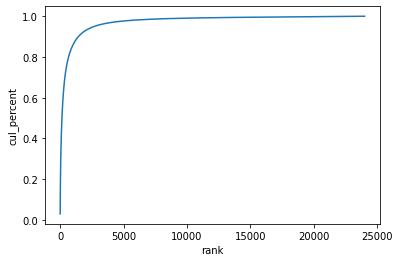

In [ ]:
# lemmatization 후
# 단어의 누적 분포 그래프 그리기

sns.lineplot(x='rank', y='cul_percent', data=wc_real);

In [ ]:
# lemmatization 후

wc_real[wc_real['rank'] <= 1000]['cul_percent'].max()

# wc_real[wc_real['rank'] <= 2000]['cul_percent'].max()    ## 0.929
# wc_real[wc_real['rank'] <= 2500]['cul_percent'].max()    ## 0.945
# wc_real[wc_real['rank'] <= 3000]['cul_percent'].max()    ## 0.956
# wc_real[wc_real['rank'] <= 4000]['cul_percent'].max()    ## 0.969
# wc_real[wc_real['rank'] <= 5000]['cul_percent'].max()    ## 0.976

0.8581417028354127

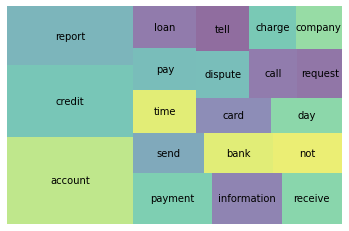

In [ ]:
# lemmatization 후
# Squarify 라이브러리를 사용 -> 등장 비율 상위 20개 단어의 결과를 시각화

wc_real_top20 = wc_real[wc_real['rank'] <= 20]
squarify.plot(sizes=wc_real_top20['percent'], label=wc_real_top20['word'], alpha=0.6)
plt.axis('off')
plt.show()

# 불용어 제거만 했을 때는 보이지 않았던 단어가 상위로 올라옴.

In [13]:
clean_complaint_narrative = []
for text in df_new['Consumer complaint narrative']:
  clean_complaint_narrative.append(pp_real(text))

# 전처리 함수를 거친 불만사항 99번째 데이터 확인
clean_complaint_narrative[99]

'send letter equifax false negative account credit report send document letter behalf determine credit furnisher verify report mislead suspicious section state failure investigate item day give reason immediately remove item credit report day delete promptly demand account delete immediately file litigation stress cause information impact equifax data breach get hand wrong person report mislead suspicious federal law violation company commit not resolve seek litigation charge violation penalty perjury swear account false misleading usc method verification account violation report valid evidence code e b code account violation report accurateunauthorizederroneous account result equifax data breach direct violation fcra reporting falsely code b exclusions consumer report account violation credit transaction suppose exclude consumer credit report social security card transactioncontacte creditoragency ask proof alleged debt specifically allege original application bearing signature able p

In [ ]:
# 원래 불만사항 99째 데이터 확인 비교
df_new['Consumer complaint narrative'][99]

"I have sent letters to Equifax, XXXX and XXXX about these false negative accounts on my credit report last XX/XX/2021. They sent my documents and letters on my behalf, and it was determined that the credit furnisher was verified. These report is misleading and suspicious. Section 611 ( a ), It states that failure to investigate these items within XXXX  days gives a reason to immediately remove those items from my credit report. Its been over XXXXdays so they should be deleted promptly. I demand that these accounts be deleted immediately or I will file for litigation due to the stress you have caused me. My information was also impacted by the Equifax data breach and may have gotten into the hands of the wrong person. These report is misleading and suspicious. Below are the federal law violations that these companies are committing! If this doesn't get resolved I will seek litigation, and charge {$1000.00} per violation. \n\nHowever All Under penalty of perjury, I swear this account is

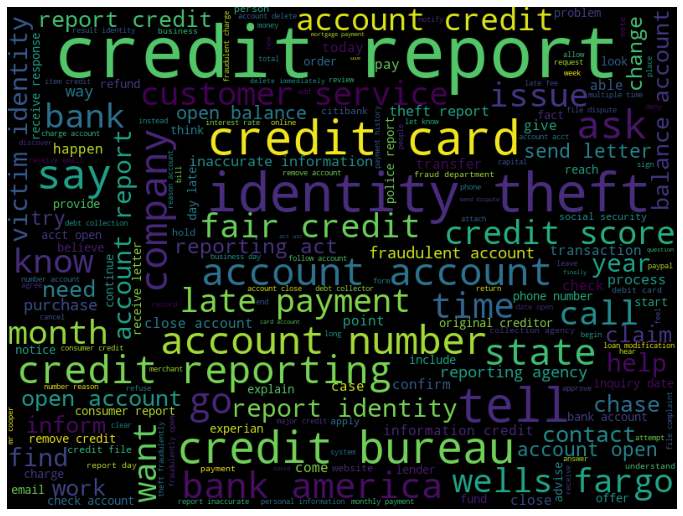

In [28]:
# 고객 불만설명에 가장 많이 사용된 단어 확인하기 (불용어 제거 & 표제어 추출 후)

cloud = WordCloud(width=800, height=600).generate(" ".join(clean_complaint_narrative))
plt.figure(figsize=(12,10))
plt.imshow(cloud)
plt.axis('off');

In [14]:
# 지금까지 전처리한 데이터를 새로운 데이터프레임으로 저장해두기 (불용어 제거 & 표제어 추출 후)

df_clean = pd.DataFrame({'product':df_new['Product'], 'complaint':clean_complaint_narrative})
df_clean.head(3)

# len(df_clean)
# 25126

product                                          complaint
0        2  submit cfpb complaint account report late repo...
1        3  worker work covid mark late comenity express c...
2        2  unfortunately victim identity theft account cr...

In [15]:
df_clean_original = df_clean.copy()

In [16]:
df_clean_original.head(3)

product                                          complaint
0        2  submit cfpb complaint account report late repo...
1        3  worker work covid mark late comenity express c...
2        2  unfortunately victim identity theft account cr...



---


## **데이터 분리하기**

In [17]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing import sequence

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Embedding, Dense, Activation, Dropout, Input
from tensorflow.keras.layers import SimpleRNN, LSTM

In [18]:
np.random.seed(42)
tf.random.set_seed(42)

In [19]:
# 데이터셋 분리

target = 'product'
feature = 'complaint'

X_train, X_test, y_train, y_test = train_test_split(df_clean[feature], df_clean[target], test_size=0.2, stratify=df_clean[target], random_state=42)  # 타겟 클래스의 불균형을 고려해서 분리

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20100,)
(5026,)
(20100,)
(5026,)


In [20]:
# train 데이터의 타겟 클래스 비율

y_train.value_counts(normalize=True)

2    0.503483
3    0.147214
1    0.102189
5    0.089055
0    0.074876
4    0.044080
8    0.018408
6    0.012537
7    0.008159
Name: product, dtype: float64

In [21]:
# test 데이터의 타겟 클래스 비율

y_test.value_counts(normalize=True)

2    0.503581
3    0.147234
1    0.102268
5    0.088938
0    0.074811
4    0.044170
8    0.018305
6    0.012535
7    0.008158
Name: product, dtype: float64

In [22]:
max_words = 10000    ## 가장 빈도높은 10000개 단어만 사용

tokenizer = Tokenizer(num_words=max_words)       ## Tokenizer 객체 만들기 (한번만 만들기, 원래는 +1 해주어야함 왜냐하면 케라스 패딩때문에?)
tokenizer.fit_on_texts(X_train)                  ## 정수 인덱스 구축하기 by 빈도수 높은 단어가 낮은 숫자 순으로 매칭 됨. (리스트 형태가 입력되어야하고, 학습데이터에만 적용하여야 한다. 테스트데이터에도 따로 해주면 인덱스 자체가 달려져서 모델에 정상적으로 적용 불가)
word_vocab = tokenizer.word_index                ## 정수 인덱스 매칭이 완료된 어휘집합 확인하기
word_count = tokenizer.word_counts               ## 각 단어 빈도수 확인하기

In [23]:
print('어휘집합: ', word_vocab)
print('어휘집합 내 단어갯수: ', len(word_vocab))

어휘집합:  {'account': 1, 'credit': 2, 'report': 3, 'payment': 4, 'information': 5, 'receive': 6, 'send': 7, 'bank': 8, 'not': 9, 'time': 10, 'pay': 11, 'loan': 12, 'card': 13, 'day': 14, 'dispute': 15, 'tell': 16, 'call': 17, 'request': 18, 'letter': 19, 'company': 20, 'debt': 21, 'charge': 22, 'say': 23, 'number': 24, 'consumer': 25, 'remove': 26, 'balance': 27, 'open': 28, 'file': 29, 'ask': 30, 'provide': 31, 'identity': 32, 'date': 33, 'state': 34, 'money': 35, 'theft': 36, 'month': 37, 'contact': 38, 'check': 39, 'email': 40, 'late': 41, 'try': 42, 'reporting': 43, 'service': 44, 'need': 45, 'phone': 46, 'claim': 47, 'inquiry': 48, 's': 49, 'mortgage': 50, 'year': 51, 'issue': 52, 'get': 53, 'collection': 54, 'go': 55, 'fraudulent': 56, 'creditor': 57, 'fraud': 58, 'know': 59, 'address': 60, 'take': 61, 'have': 62, 'complaint': 63, 'close': 64, 'item': 65, 'help': 66, 'statement': 67, 'agency': 68, 'give': 69, 'inaccurate': 70, 'act': 71, 'customer': 72, 'transaction': 73, 'response'

In [24]:
print('어휘집합: ', sorted(word_count.items(), key=lambda x: x[1], reverse=True))
print('어휘집합 내 단어갯수: ', len(word_count))

어휘집합:  [('account', 42397), ('credit', 35126), ('report', 28846), ('payment', 15493), ('information', 13735), ('receive', 12033), ('send', 11213), ('bank', 10784), ('not', 10689), ('time', 10466), ('pay', 10427), ('loan', 10422), ('card', 10234), ('day', 9915), ('dispute', 9500), ('tell', 9246), ('call', 9212), ('request', 8530), ('letter', 7608), ('company', 7603), ('debt', 7598), ('charge', 7593), ('say', 7537), ('number', 7503), ('consumer', 7284), ('remove', 7125), ('balance', 6823), ('open', 6686), ('file', 6551), ('ask', 6465), ('provide', 6338), ('identity', 6281), ('date', 6247), ('state', 6101), ('money', 5975), ('theft', 5831), ('month', 5701), ('contact', 5688), ('check', 5669), ('email', 5311), ('late', 5164), ('try', 5080), ('reporting', 4949), ('service', 4901), ('need', 4785), ('phone', 4778), ('claim', 4737), ('inquiry', 4733), ('s', 4702), ('mortgage', 4656), ('year', 4483), ('issue', 4466), ('get', 4436), ('collection', 4409), ('go', 4363), ('fraudulent', 4361), ('cre

In [25]:
train_text_seq = tokenizer.texts_to_sequences(X_train)    ## train 데이터 문자열을 정수 인덱스로 변환하여 리스트로 만들기
test_text_seq = tokenizer.texts_to_sequences(X_test)      ## test  데이터 문자열을 정수 인덱스로 변환하여 리스트로 만들기

print(train_text_seq[0])

[92, 26, 56, 1, 2, 3]


In [26]:
max_features = 10000
maxlen = 120    # 텍스트 하나당 단어 갯수 중간값 = 119

In [27]:
train_seq_matrix = pad_sequences(train_text_seq, maxlen=maxlen)    ## train 데이터 pad_sequence 를 통해 패딩 처리
test_seq_matrix = pad_sequences(test_text_seq, maxlen=maxlen)    ## test 데이터 pad_sequence 를 통해 패딩 처리

print(train_seq_matrix[0])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 92 26 56  1  2  3]


### **SimpleRNN / max_word = max_features = 10,000 / 임베딩차원 = 32 / 배치사이즈 = 128**

In [39]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(9, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 9)                 297       
                                                                 
Total params: 322,377
Trainable params: 322,377
Non-trainable params: 0
_________________________________________________________________


In [40]:
history = model.fit(train_seq_matrix, y_train, epochs=15, batch_size=128, validation_split=0.2)

Epoch 1/15
126/126 [==============================] - 7s 45ms/step - loss: 1.5240 - accuracy: 0.5067 - val_loss: 1.2537 - val_accuracy: 0.5433
Epoch 2/15
126/126 [==============================] - 5s 43ms/step - loss: 1.0930 - accuracy: 0.6218 - val_loss: 1.0079 - val_accuracy: 0.6512
Epoch 3/15
126/126 [==============================] - 5s 42ms/step - loss: 0.8495 - accuracy: 0.7297 - val_loss: 0.8430 - val_accuracy: 0.7363
Epoch 4/15
126/126 [==============================] - 5s 42ms/step - loss: 0.6992 - accuracy: 0.7825 - val_loss: 0.8451 - val_accuracy: 0.7269
Epoch 5/15
126/126 [==============================] - 5s 43ms/step - loss: 0.5916 - accuracy: 0.8157 - val_loss: 0.7755 - val_accuracy: 0.7527
Epoch 6/15
126/126 [==============================] - 5s 42ms/step - loss: 0.5763 - accuracy: 0.8192 - val_loss: 0.7712 - val_accuracy: 0.7562
Epoch 7/15
126/126 [==============================] - 5s 43ms/step - loss: 0.4682 - accuracy: 0.8581 - val_loss: 0.7749 - val_accuracy: 0.7545

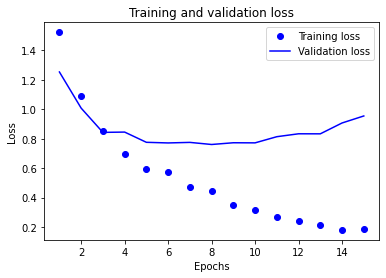

In [41]:
# train & val 손실 확인하기

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

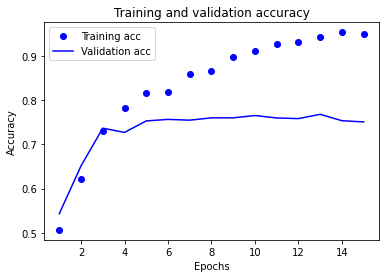

In [42]:
# train & val 정확도 확인하기

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show();

### **SimpleRNN / max_word = max_features = 10,000 / 임베딩차원 = 64 / 배치사이즈 = 128**

In [43]:
model = Sequential()
model.add(Embedding(max_features, 64))
model.add(SimpleRNN(64))
model.add(Dense(9, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 64)          640000    
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 9)                 585       
                                                                 
Total params: 648,841
Trainable params: 648,841
Non-trainable params: 0
_________________________________________________________________


In [44]:
history = model.fit(train_seq_matrix, y_train, epochs=15, batch_size=128, validation_split=0.2)

Epoch 1/15
126/126 [==============================] - 10s 70ms/step - loss: 1.3849 - accuracy: 0.5340 - val_loss: 1.0944 - val_accuracy: 0.6037
Epoch 2/15
126/126 [==============================] - 9s 68ms/step - loss: 1.0061 - accuracy: 0.6421 - val_loss: 1.0347 - val_accuracy: 0.6159
Epoch 3/15
126/126 [==============================] - 9s 68ms/step - loss: 0.8399 - accuracy: 0.7175 - val_loss: 0.8936 - val_accuracy: 0.6945
Epoch 4/15
126/126 [==============================] - 9s 68ms/step - loss: 0.6708 - accuracy: 0.7797 - val_loss: 0.8121 - val_accuracy: 0.7209
Epoch 5/15
126/126 [==============================] - 9s 68ms/step - loss: 0.5185 - accuracy: 0.8363 - val_loss: 0.8020 - val_accuracy: 0.7333
Epoch 6/15
126/126 [==============================] - 9s 69ms/step - loss: 0.4149 - accuracy: 0.8728 - val_loss: 0.7527 - val_accuracy: 0.7607
Epoch 7/15
126/126 [==============================] - 9s 69ms/step - loss: 0.3272 - accuracy: 0.9062 - val_loss: 0.7807 - val_accuracy: 0.753

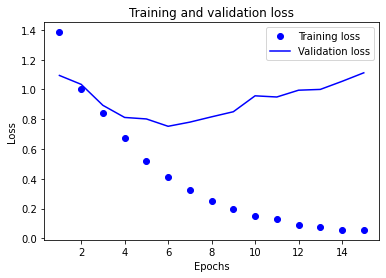

In [45]:
# train & val 손실 확인하기

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

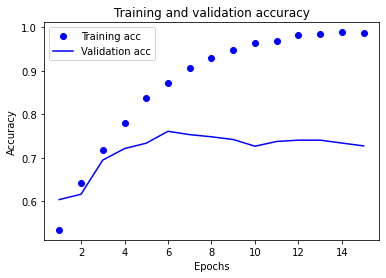

In [46]:
# train & val 정확도 확인하기

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show();

### **SimpleRNN / max_word = max_features = 10,000 / 임베딩차원 = 128 / 배치사이즈 = 128**

In [38]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128))
model.add(Dense(9, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         1280000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               32896     
                                                                 
 dense (Dense)               (None, 9)                 1161      
                                                                 
Total params: 1,314,057
Trainable params: 1,314,057
Non-trainable params: 0
_________________________________________________________________


In [39]:
history = model.fit(train_seq_matrix, y_train, epochs=15, batch_size=128, validation_split=0.2)

Epoch 1/15
126/126 [==============================] - 19s 140ms/step - loss: 1.5091 - accuracy: 0.5010 - val_loss: 1.2372 - val_accuracy: 0.5490
Epoch 2/15
126/126 [==============================] - 17s 138ms/step - loss: 1.0730 - accuracy: 0.6307 - val_loss: 1.0130 - val_accuracy: 0.6580
Epoch 3/15
126/126 [==============================] - 17s 136ms/step - loss: 0.6553 - accuracy: 0.7909 - val_loss: 0.8589 - val_accuracy: 0.6980
Epoch 4/15
126/126 [==============================] - 17s 136ms/step - loss: 0.3959 - accuracy: 0.8829 - val_loss: 0.8764 - val_accuracy: 0.7045
Epoch 5/15
126/126 [==============================] - 18s 142ms/step - loss: 0.2644 - accuracy: 0.9290 - val_loss: 0.9536 - val_accuracy: 0.7102
Epoch 6/15
126/126 [==============================] - 17s 135ms/step - loss: 0.1497 - accuracy: 0.9653 - val_loss: 1.0105 - val_accuracy: 0.6978
Epoch 7/15
126/126 [==============================] - 17s 136ms/step - loss: 0.0885 - accuracy: 0.9817 - val_loss: 1.0994 - val_ac

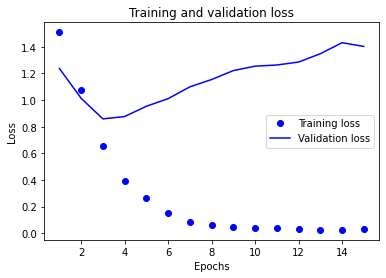

In [40]:
# train & val 손실 확인하기

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

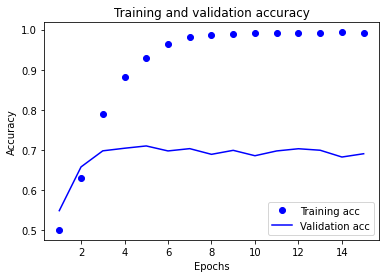

In [41]:
# train & val 정확도 확인하기

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show();

### **LSTM / max_word = max_features = 10,000 / 임베딩차원 = 32 / 배치사이즈 = 128**

In [42]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(9, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 9)                 297       
                                                                 
Total params: 328,617
Trainable params: 328,617
Non-trainable params: 0
_________________________________________________________________


In [43]:
history = model.fit(train_seq_matrix, y_train, epochs=15, batch_size=128, validation_split=0.2)

Epoch 1/15
126/126 [==============================] - 14s 91ms/step - loss: 1.4800 - accuracy: 0.5136 - val_loss: 1.2105 - val_accuracy: 0.5455
Epoch 2/15
126/126 [==============================] - 11s 87ms/step - loss: 1.0946 - accuracy: 0.6229 - val_loss: 1.0068 - val_accuracy: 0.6413
Epoch 3/15
126/126 [==============================] - 11s 87ms/step - loss: 0.8097 - accuracy: 0.7228 - val_loss: 0.7742 - val_accuracy: 0.7425
Epoch 4/15
126/126 [==============================] - 11s 87ms/step - loss: 0.6617 - accuracy: 0.7804 - val_loss: 0.7366 - val_accuracy: 0.7612
Epoch 5/15
126/126 [==============================] - 11s 87ms/step - loss: 0.5847 - accuracy: 0.8060 - val_loss: 0.7093 - val_accuracy: 0.7729
Epoch 6/15
126/126 [==============================] - 11s 88ms/step - loss: 0.5517 - accuracy: 0.8203 - val_loss: 0.7118 - val_accuracy: 0.7801
Epoch 7/15
126/126 [==============================] - 11s 88ms/step - loss: 0.4847 - accuracy: 0.8434 - val_loss: 0.6967 - val_accuracy:

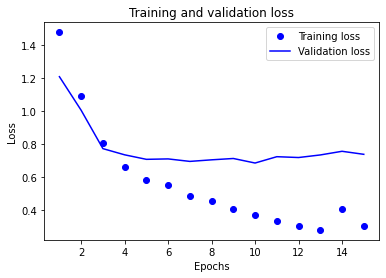

In [44]:
# train & val 손실 확인하기

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

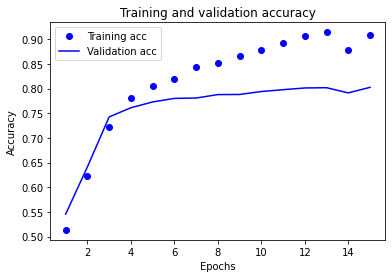

In [45]:
# train & val 정확도 확인하기

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show();

### **LSTM / max_word = max_features = 10,000 / 임베딩차원 = 64 / 배치사이즈 = 128**

In [46]:
model = Sequential()
model.add(Embedding(max_features, 64))
model.add(LSTM(64))
model.add(Dense(9, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 64)          640000    
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 9)                 585       
                                                                 
Total params: 673,609
Trainable params: 673,609
Non-trainable params: 0
_________________________________________________________________


In [48]:
history = model.fit(train_seq_matrix, y_train, epochs=15, batch_size=128, validation_split=0.2)

Epoch 1/15
126/126 [==============================] - 23s 182ms/step - loss: 1.3479 - accuracy: 0.5495 - val_loss: 1.0619 - val_accuracy: 0.6032
Epoch 2/15
126/126 [==============================] - 20s 161ms/step - loss: 0.8419 - accuracy: 0.7198 - val_loss: 0.7600 - val_accuracy: 0.7542
Epoch 3/15
126/126 [==============================] - 20s 161ms/step - loss: 0.6126 - accuracy: 0.8103 - val_loss: 0.7007 - val_accuracy: 0.7838
Epoch 4/15
126/126 [==============================] - 20s 161ms/step - loss: 0.5049 - accuracy: 0.8462 - val_loss: 0.7239 - val_accuracy: 0.7823
Epoch 5/15
126/126 [==============================] - 20s 162ms/step - loss: 0.4497 - accuracy: 0.8606 - val_loss: 0.6685 - val_accuracy: 0.8000
Epoch 6/15
126/126 [==============================] - 21s 167ms/step - loss: 0.3827 - accuracy: 0.8826 - val_loss: 0.6502 - val_accuracy: 0.8112
Epoch 7/15
126/126 [==============================] - 20s 161ms/step - loss: 0.3557 - accuracy: 0.8913 - val_loss: 0.6789 - val_ac

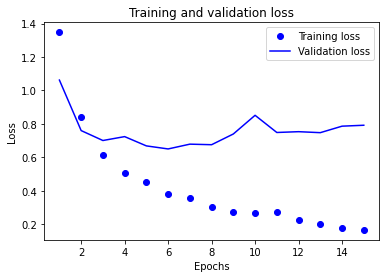

In [49]:
# train & val 손실 확인하기

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

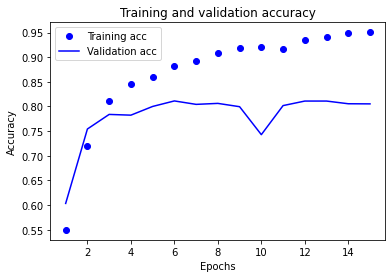

In [50]:
# train & val 정확도 확인하기

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show();

### **LSTM / max_word = max_features = 10,000 / 임베딩차원 = 128 / 배치사이즈 = 128**

In [51]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128))
model.add(Dense(9, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 128)         1280000   
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
                                                                 
 dense_3 (Dense)             (None, 9)                 1161      
                                                                 
Total params: 1,412,745
Trainable params: 1,412,745
Non-trainable params: 0
_________________________________________________________________


In [52]:
history = model.fit(train_seq_matrix, y_train, epochs=15, batch_size=128, validation_split=0.2)

Epoch 1/15
126/126 [==============================] - 70s 535ms/step - loss: 1.2476 - accuracy: 0.5651 - val_loss: 0.9933 - val_accuracy: 0.6582
Epoch 2/15
126/126 [==============================] - 60s 475ms/step - loss: 0.8037 - accuracy: 0.7336 - val_loss: 0.7806 - val_accuracy: 0.7602
Epoch 3/15
126/126 [==============================] - 60s 473ms/step - loss: 0.6442 - accuracy: 0.7963 - val_loss: 0.6863 - val_accuracy: 0.7893
Epoch 4/15
126/126 [==============================] - 59s 471ms/step - loss: 0.5104 - accuracy: 0.8393 - val_loss: 0.6888 - val_accuracy: 0.7853
Epoch 5/15
126/126 [==============================] - 60s 477ms/step - loss: 0.4915 - accuracy: 0.8476 - val_loss: 0.6715 - val_accuracy: 0.7933
Epoch 6/15
126/126 [==============================] - 59s 472ms/step - loss: 0.3847 - accuracy: 0.8817 - val_loss: 0.6413 - val_accuracy: 0.8030
Epoch 7/15
126/126 [==============================] - 60s 477ms/step - loss: 0.3277 - accuracy: 0.9002 - val_loss: 0.6645 - val_ac

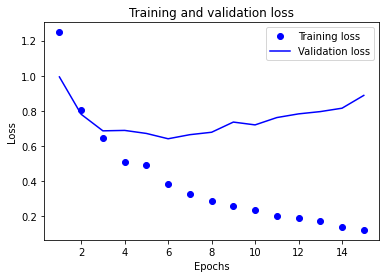

In [53]:
# train & val 손실 확인하기

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

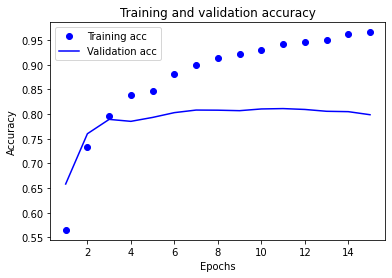

In [54]:
# train & val 정확도 확인하기

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show();

# **하이퍼파라미터 튜닝 & 규제(드롭아웃, 조기종료)**

In [ ]:
# batch_size
# 너무 크면 한번에 처리해야할 양이 그만큼 많기 때문에 학습 속도가 느려지거나, 메모리부족 문제 발생.
# 너무 작으면 가중치가 자주 업데이트되기 때문에 비교적 불안정하게 훈련.
# => 따라서 배치 사이즈를 바꿔가면서 언제 모델이 가장 효율적으로 훈련되는지를 살펴볼 필요가 있음.

### **LSTM /임베딩차원 = 32 / 배치사이즈 = 256**

In [65]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32, dropout=0.3, recurrent_dropout=0.3))
model.add(Dense(9, activation='softmax'))

adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=adam, 
              metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm_6 (LSTM)               (None, 32)                8320      
                                                                 
 dense_7 (Dense)             (None, 9)                 297       
                                                                 
Total params: 328,617
Trainable params: 328,617
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [56]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-lstm.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=6, restore_best_weights=True)
history = model.fit(train_seq_matrix, y_train, epochs=20, batch_size=256, validation_split=0.2, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
63/63 [==============================] - 20s 270ms/step - loss: 1.7474 - accuracy: 0.4899 - val_loss: 1.4951 - val_accuracy: 0.5010
Epoch 2/20
63/63 [==============================] - 22s 345ms/step - loss: 1.2894 - accuracy: 0.5260 - val_loss: 1.1745 - val_accuracy: 0.5632
Epoch 3/20
63/63 [==============================] - 24s 375ms/step - loss: 1.0941 - accuracy: 0.6249 - val_loss: 1.1035 - val_accuracy: 0.6187
Epoch 4/20
63/63 [==============================] - 17s 270ms/step - loss: 0.9747 - accuracy: 0.6745 - val_loss: 0.9824 - val_accuracy: 0.6667
Epoch 5/20
63/63 [==============================] - 17s 271ms/step - loss: 0.8423 - accuracy: 0.7376 - val_loss: 0.8370 - val_accuracy: 0.7400
Epoch 6/20
63/63 [==============================] - 16s 259ms/step - loss: 0.7039 - accuracy: 0.7745 - val_loss: 0.7512 - val_accuracy: 0.7634
Epoch 7/20
63/63 [==============================] - 17s 262ms/step - loss: 0.6178 - accuracy: 0.8016 - val_loss: 0.7175 - val_accuracy: 0.7704

### **LSTM /임베딩차원 = 32 / 배치사이즈 = 128**

In [58]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-lstm.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=6, restore_best_weights=True)
history = model.fit(train_seq_matrix, y_train, epochs=20, batch_size=128, validation_split=0.2, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
126/126 [==============================] - 26s 184ms/step - loss: 1.4984 - accuracy: 0.5086 - val_loss: 1.2238 - val_accuracy: 0.5403
Epoch 2/20
126/126 [==============================] - 23s 183ms/step - loss: 1.0983 - accuracy: 0.6005 - val_loss: 0.9848 - val_accuracy: 0.6403
Epoch 3/20
126/126 [==============================] - 23s 181ms/step - loss: 0.8790 - accuracy: 0.6971 - val_loss: 0.8328 - val_accuracy: 0.7363
Epoch 4/20
126/126 [==============================] - 23s 182ms/step - loss: 0.7088 - accuracy: 0.7666 - val_loss: 0.7639 - val_accuracy: 0.7450
Epoch 5/20
126/126 [==============================] - 23s 184ms/step - loss: 0.6097 - accuracy: 0.7960 - val_loss: 0.6783 - val_accuracy: 0.7915
Epoch 6/20
126/126 [==============================] - 23s 186ms/step - loss: 0.5375 - accuracy: 0.8246 - val_loss: 0.6643 - val_accuracy: 0.7958
Epoch 7/20
126/126 [==============================] - 23s 185ms/step - loss: 0.4771 - accuracy: 0.8486 - val_loss: 0.6439 - val_ac

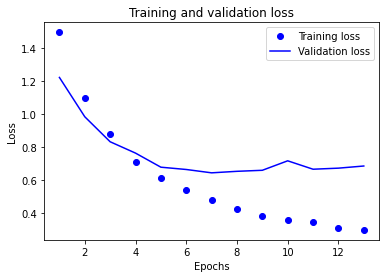

In [59]:
# train & val 손실 확인하기

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

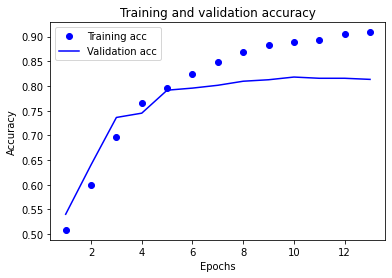

In [60]:
# train & val 정확도 확인하기

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show();

### **LSTM /임베딩차원 = 32 / 배치사이즈 = 64**



In [62]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-lstm.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=6, restore_best_weights=True)
history = model.fit(train_seq_matrix, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
252/252 [==============================] - 42s 149ms/step - loss: 1.3563 - accuracy: 0.5451 - val_loss: 1.0651 - val_accuracy: 0.6353
Epoch 2/20
252/252 [==============================] - 35s 141ms/step - loss: 0.9508 - accuracy: 0.6791 - val_loss: 0.8916 - val_accuracy: 0.7192
Epoch 3/20
252/252 [==============================] - 35s 140ms/step - loss: 0.7388 - accuracy: 0.7597 - val_loss: 0.7359 - val_accuracy: 0.7617
Epoch 4/20
252/252 [==============================] - 35s 140ms/step - loss: 0.6063 - accuracy: 0.8050 - val_loss: 0.7275 - val_accuracy: 0.7677
Epoch 5/20
252/252 [==============================] - 35s 141ms/step - loss: 0.5315 - accuracy: 0.8301 - val_loss: 0.6515 - val_accuracy: 0.7925
Epoch 6/20
252/252 [==============================] - 35s 141ms/step - loss: 0.4714 - accuracy: 0.8496 - val_loss: 0.6539 - val_accuracy: 0.8047
Epoch 7/20
252/252 [==============================] - 35s 141ms/step - loss: 0.4185 - accuracy: 0.8736 - val_loss: 0.6679 - val_ac

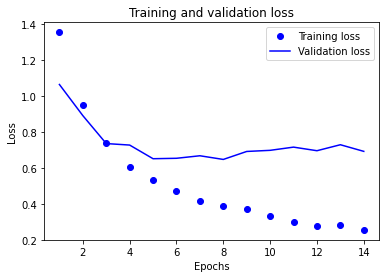

In [63]:
# train & val 손실 확인하기

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

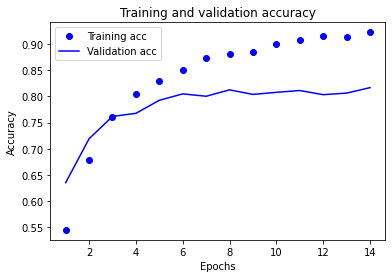

In [64]:
# train & val 정확도 확인하기

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show();

### **LSTM /임베딩차원 = 32 / 배치사이즈 = 32**


In [66]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-lstm.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=6, restore_best_weights=True)
history = model.fit(train_seq_matrix, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
503/503 [==============================] - 65s 124ms/step - loss: 1.2578 - accuracy: 0.5589 - val_loss: 1.0184 - val_accuracy: 0.6341
Epoch 2/20
503/503 [==============================] - 65s 129ms/step - loss: 0.8804 - accuracy: 0.6942 - val_loss: 0.7929 - val_accuracy: 0.7231
Epoch 3/20
503/503 [==============================] - 62s 123ms/step - loss: 0.7069 - accuracy: 0.7617 - val_loss: 0.7285 - val_accuracy: 0.7488
Epoch 4/20
503/503 [==============================] - 63s 125ms/step - loss: 0.5841 - accuracy: 0.8022 - val_loss: 0.6892 - val_accuracy: 0.7831
Epoch 5/20
503/503 [==============================] - 63s 126ms/step - loss: 0.5047 - accuracy: 0.8359 - val_loss: 0.6523 - val_accuracy: 0.7945
Epoch 6/20
503/503 [==============================] - 63s 125ms/step - loss: 0.4477 - accuracy: 0.8522 - val_loss: 0.6426 - val_accuracy: 0.8037
Epoch 7/20
503/503 [==============================] - 62s 124ms/step - loss: 0.4035 - accuracy: 0.8719 - val_loss: 0.6520 - val_ac

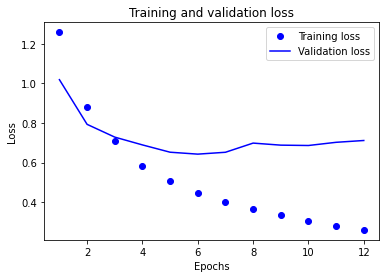

In [67]:
# train & val 손실 확인하기

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

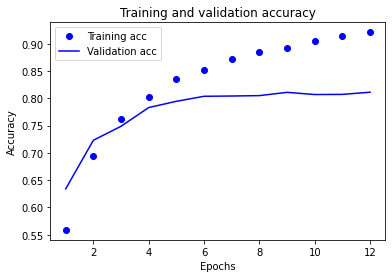

In [68]:
# train & val 정확도 확인하기

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show();

### **LSTM / 임베딩차원 = 64 / 배치사이즈 = 256**

In [83]:
model = Sequential()
model.add(Embedding(max_features, 64))
model.add(LSTM(64, dropout=0.3, recurrent_dropout=0.3))
model.add(Dense(9, activation='softmax'))

adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=adam, 
              metrics=['accuracy'])

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, None, 64)          640000    
                                                                 
 lstm_12 (LSTM)              (None, 64)                33024     
                                                                 
 dense_13 (Dense)            (None, 9)                 585       
                                                                 
Total params: 673,609
Trainable params: 673,609
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [71]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-lstm.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=6, restore_best_weights=True)
history = model.fit(train_seq_matrix, y_train, epochs=20, batch_size=256, validation_split=0.2, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
63/63 [==============================] - 37s 535ms/step - loss: 1.5681 - accuracy: 0.5093 - val_loss: 1.2095 - val_accuracy: 0.5774
Epoch 2/20
63/63 [==============================] - 33s 530ms/step - loss: 1.0817 - accuracy: 0.6250 - val_loss: 1.0094 - val_accuracy: 0.6403
Epoch 3/20
63/63 [==============================] - 33s 528ms/step - loss: 0.8709 - accuracy: 0.7055 - val_loss: 0.8040 - val_accuracy: 0.7261
Epoch 4/20
63/63 [==============================] - 33s 531ms/step - loss: 0.7210 - accuracy: 0.7557 - val_loss: 0.7774 - val_accuracy: 0.7264
Epoch 5/20
63/63 [==============================] - 34s 533ms/step - loss: 0.6300 - accuracy: 0.7842 - val_loss: 0.7303 - val_accuracy: 0.7694
Epoch 6/20
63/63 [==============================] - 33s 532ms/step - loss: 0.5430 - accuracy: 0.8244 - val_loss: 0.7021 - val_accuracy: 0.7779
Epoch 7/20
63/63 [==============================] - 33s 530ms/step - loss: 0.4899 - accuracy: 0.8432 - val_loss: 0.6681 - val_accuracy: 0.7950

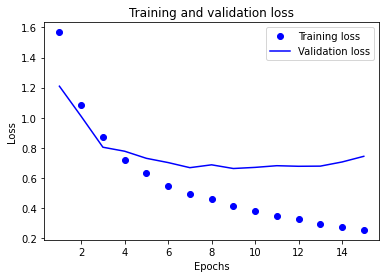

In [72]:
# train & val 손실 확인하기

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

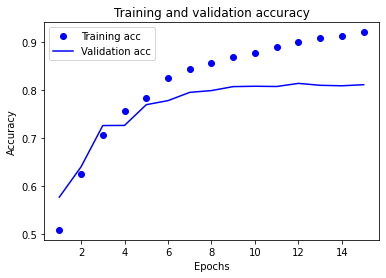

In [73]:
# train & val 정확도 확인하기

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show();

### **LSTM / 임베딩차원 = 64 / 배치사이즈 = 128**



In [75]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-lstm.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=6, restore_best_weights=True)
history = model.fit(train_seq_matrix, y_train, epochs=20, batch_size=128, validation_split=0.2, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
126/126 [==============================] - 45s 322ms/step - loss: 1.4045 - accuracy: 0.5343 - val_loss: 1.1029 - val_accuracy: 0.5985
Epoch 2/20
126/126 [==============================] - 39s 312ms/step - loss: 0.9145 - accuracy: 0.6900 - val_loss: 0.7736 - val_accuracy: 0.7473
Epoch 3/20
126/126 [==============================] - 39s 311ms/step - loss: 0.6783 - accuracy: 0.7780 - val_loss: 0.7217 - val_accuracy: 0.7672
Epoch 4/20
126/126 [==============================] - 40s 317ms/step - loss: 0.5901 - accuracy: 0.8113 - val_loss: 0.6877 - val_accuracy: 0.7756
Epoch 5/20
126/126 [==============================] - 39s 311ms/step - loss: 0.5328 - accuracy: 0.8251 - val_loss: 0.7221 - val_accuracy: 0.7776
Epoch 6/20
126/126 [==============================] - 40s 318ms/step - loss: 0.4626 - accuracy: 0.8534 - val_loss: 0.6528 - val_accuracy: 0.8032
Epoch 7/20
126/126 [==============================] - 39s 312ms/step - loss: 0.4069 - accuracy: 0.8718 - val_loss: 0.6481 - val_ac

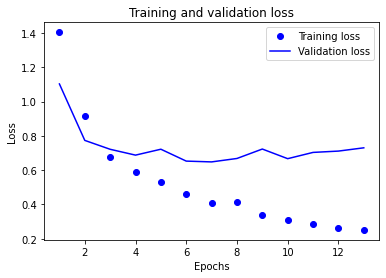

In [76]:
# train & val 손실 확인하기

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

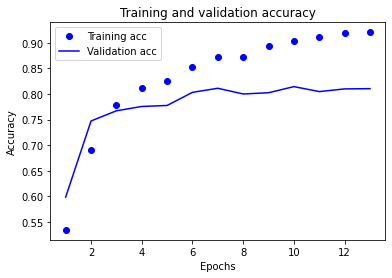

In [77]:
# train & val 정확도 확인하기

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show();

### **LSTM / 임베딩차원 = 64 / 배치사이즈 = 64**


In [79]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-lstm.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=6, restore_best_weights=True)
history = model.fit(train_seq_matrix, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
252/252 [==============================] - 65s 245ms/step - loss: 1.2561 - accuracy: 0.5650 - val_loss: 1.0241 - val_accuracy: 0.6286
Epoch 2/20
252/252 [==============================] - 56s 223ms/step - loss: 0.8120 - accuracy: 0.7252 - val_loss: 0.7779 - val_accuracy: 0.7428
Epoch 3/20
252/252 [==============================] - 56s 223ms/step - loss: 0.6337 - accuracy: 0.7868 - val_loss: 0.6838 - val_accuracy: 0.7818
Epoch 4/20
252/252 [==============================] - 56s 223ms/step - loss: 0.5114 - accuracy: 0.8299 - val_loss: 0.6401 - val_accuracy: 0.7965
Epoch 5/20
252/252 [==============================] - 56s 223ms/step - loss: 0.4712 - accuracy: 0.8498 - val_loss: 0.6252 - val_accuracy: 0.8072
Epoch 6/20
252/252 [==============================] - 56s 223ms/step - loss: 0.3952 - accuracy: 0.8741 - val_loss: 0.6442 - val_accuracy: 0.8107
Epoch 7/20
252/252 [==============================] - 56s 223ms/step - loss: 0.3352 - accuracy: 0.8951 - val_loss: 0.6688 - val_ac

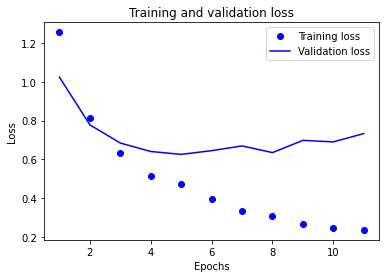

In [80]:
# train & val 손실 확인하기

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

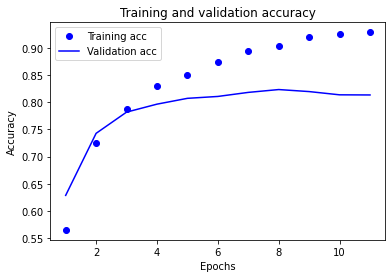

In [81]:
# train & val 정확도 확인하기

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show();

### **LSTM / 임베딩차원 = 64 / 배치사이즈 = 32**

In [84]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-lstm.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=6, restore_best_weights=True)
history = model.fit(train_seq_matrix, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
503/503 [==============================] - 95s 183ms/step - loss: 1.1360 - accuracy: 0.5992 - val_loss: 0.8773 - val_accuracy: 0.7162
Epoch 2/20
503/503 [==============================] - 88s 176ms/step - loss: 0.7716 - accuracy: 0.7481 - val_loss: 0.7181 - val_accuracy: 0.7684
Epoch 3/20
503/503 [==============================] - 87s 174ms/step - loss: 0.5906 - accuracy: 0.8120 - val_loss: 0.6458 - val_accuracy: 0.7910
Epoch 4/20
503/503 [==============================] - 95s 189ms/step - loss: 0.5513 - accuracy: 0.8257 - val_loss: 0.6575 - val_accuracy: 0.7978
Epoch 5/20
503/503 [==============================] - 88s 175ms/step - loss: 0.4382 - accuracy: 0.8640 - val_loss: 0.6312 - val_accuracy: 0.8119
Epoch 6/20
503/503 [==============================] - 88s 175ms/step - loss: 0.3769 - accuracy: 0.8831 - val_loss: 0.6294 - val_accuracy: 0.8187
Epoch 7/20
503/503 [==============================] - 87s 174ms/step - loss: 0.3341 - accuracy: 0.8995 - val_loss: 0.6796 - val_ac

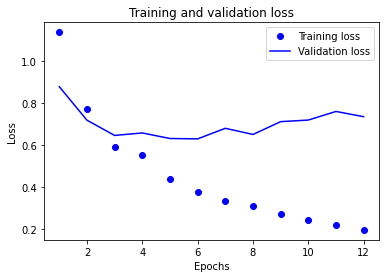

In [85]:
# train & val 손실 확인하기

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

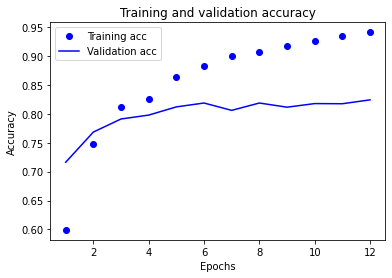

In [86]:
# train & val 정확도 확인하기

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show();

### **LSTM / 임베딩차원 = 128 / 배치사이즈 = 256**

In [32]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.3, recurrent_dropout=0.3))
model.add(Dense(9, activation='softmax'))

adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=adam, 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         1280000   
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 9)                 1161      
                                                                 
Total params: 1,412,745
Trainable params: 1,412,745
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [88]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-lstm.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=6, restore_best_weights=True)
history = model.fit(train_seq_matrix, y_train, epochs=20, batch_size=256, validation_split=0.2, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
63/63 [==============================] - 113s 2s/step - loss: 1.4840 - accuracy: 0.5119 - val_loss: 1.1805 - val_accuracy: 0.5711
Epoch 2/20
63/63 [==============================] - 96s 1s/step - loss: 0.9779 - accuracy: 0.6601 - val_loss: 0.8395 - val_accuracy: 0.7251
Epoch 3/20
63/63 [==============================] - 83s 1s/step - loss: 0.6953 - accuracy: 0.7745 - val_loss: 0.7014 - val_accuracy: 0.7841
Epoch 4/20
63/63 [==============================] - 82s 1s/step - loss: 0.5540 - accuracy: 0.8274 - val_loss: 0.6597 - val_accuracy: 0.7970
Epoch 5/20
63/63 [==============================] - 82s 1s/step - loss: 0.4776 - accuracy: 0.8519 - val_loss: 0.6307 - val_accuracy: 0.8067
Epoch 6/20
63/63 [==============================] - 81s 1s/step - loss: 0.3980 - accuracy: 0.8767 - val_loss: 0.6032 - val_accuracy: 0.8179
Epoch 7/20
63/63 [==============================] - 81s 1s/step - loss: 0.3759 - accuracy: 0.8870 - val_loss: 0.6497 - val_accuracy: 0.8109
Epoch 8/20
63/63 [=

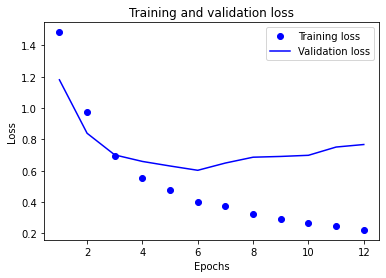

In [89]:
# train & val 손실 확인하기

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

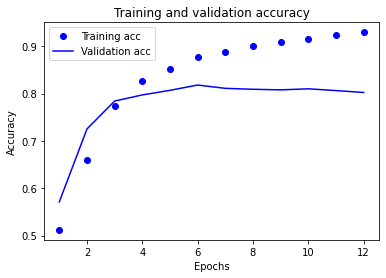

In [90]:
# train & val 정확도 확인하기

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show();

### **LSTM / 임베딩차원 = 128 / 배치사이즈 = 128**


In [33]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-lstm128.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=6, restore_best_weights=True)
history = model.fit(train_seq_matrix, y_train, epochs=20, batch_size=128, validation_split=0.2, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
126/126 [==============================] - 99s 761ms/step - loss: 1.2839 - accuracy: 0.5647 - val_loss: 0.9849 - val_accuracy: 0.6619
Epoch 2/20
126/126 [==============================] - 95s 756ms/step - loss: 0.8307 - accuracy: 0.7246 - val_loss: 0.7520 - val_accuracy: 0.7682
Epoch 3/20
126/126 [==============================] - 95s 752ms/step - loss: 0.6239 - accuracy: 0.8005 - val_loss: 0.7095 - val_accuracy: 0.7731
Epoch 4/20
126/126 [==============================] - 96s 763ms/step - loss: 0.5427 - accuracy: 0.8271 - val_loss: 0.6684 - val_accuracy: 0.7923
Epoch 5/20
126/126 [==============================] - 97s 768ms/step - loss: 0.4605 - accuracy: 0.8537 - val_loss: 0.6513 - val_accuracy: 0.8015
Epoch 6/20
126/126 [==============================] - 96s 764ms/step - loss: 0.4248 - accuracy: 0.8695 - val_loss: 0.6700 - val_accuracy: 0.7891
Epoch 7/20
126/126 [==============================] - 95s 756ms/step - loss: 0.4015 - accuracy: 0.8697 - val_loss: 0.6581 - val_ac

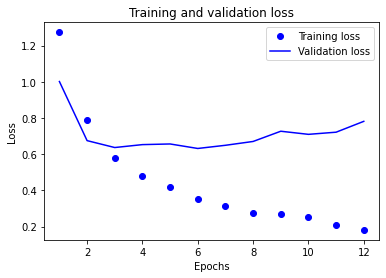

In [94]:
# train & val 손실 확인하기

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

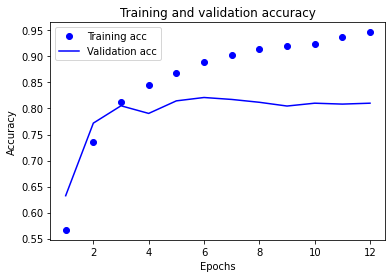

In [95]:
# train & val 정확도 확인하기

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show();

### **LSTM / 임베딩차원 = 128 / 배치사이즈 = 64**


In [29]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-lstm.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=6, restore_best_weights=True)
history = model.fit(train_seq_matrix, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
252/252 [==============================] - 145s 561ms/step - loss: 1.1222 - accuracy: 0.6104 - val_loss: 0.8489 - val_accuracy: 0.7299
Epoch 2/20
252/252 [==============================] - 123s 489ms/step - loss: 0.7612 - accuracy: 0.7424 - val_loss: 0.7490 - val_accuracy: 0.7460
Epoch 3/20
252/252 [==============================] - 123s 487ms/step - loss: 0.6092 - accuracy: 0.7986 - val_loss: 0.8393 - val_accuracy: 0.7254
Epoch 4/20
252/252 [==============================] - 122s 485ms/step - loss: 0.5435 - accuracy: 0.8276 - val_loss: 0.6532 - val_accuracy: 0.7938
Epoch 5/20
252/252 [==============================] - 122s 484ms/step - loss: 0.4171 - accuracy: 0.8693 - val_loss: 0.6297 - val_accuracy: 0.8132
Epoch 6/20
252/252 [==============================] - 122s 484ms/step - loss: 0.3550 - accuracy: 0.8898 - val_loss: 0.6299 - val_accuracy: 0.8147
Epoch 7/20
252/252 [==============================] - 121s 480ms/step - loss: 0.3122 - accuracy: 0.9037 - val_loss: 0.6555 -

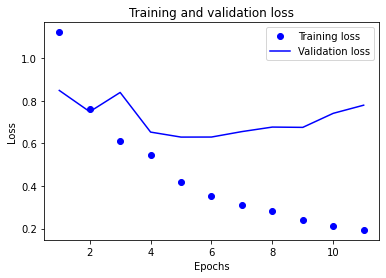

In [30]:
# train & val 손실 확인하기

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

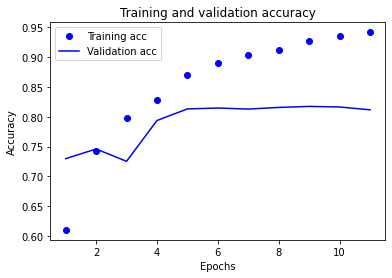

In [31]:
# train & val 정확도 확인하기

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show();

### **LSTM / 임베딩차원 = 128 / 배치사이즈 = 32**


In [101]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-lstm.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=6, restore_best_weights=True)
history = model.fit(train_seq_matrix, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
503/503 [==============================] - 181s 355ms/step - loss: 1.0548 - accuracy: 0.6331 - val_loss: 0.7908 - val_accuracy: 0.7435
Epoch 2/20
503/503 [==============================] - 178s 355ms/step - loss: 0.6589 - accuracy: 0.7845 - val_loss: 0.6645 - val_accuracy: 0.7891
Epoch 3/20
503/503 [==============================] - 176s 350ms/step - loss: 0.5515 - accuracy: 0.8269 - val_loss: 0.6410 - val_accuracy: 0.7983
Epoch 4/20
503/503 [==============================] - 178s 354ms/step - loss: 0.4430 - accuracy: 0.8625 - val_loss: 0.6251 - val_accuracy: 0.8092
Epoch 5/20
503/503 [==============================] - 177s 352ms/step - loss: 0.3919 - accuracy: 0.8768 - val_loss: 0.6581 - val_accuracy: 0.8070
Epoch 6/20
503/503 [==============================] - 176s 350ms/step - loss: 0.3252 - accuracy: 0.8971 - val_loss: 0.6420 - val_accuracy: 0.8172
Epoch 7/20
503/503 [==============================] - 176s 349ms/step - loss: 0.2742 - accuracy: 0.9170 - val_loss: 0.6695 -

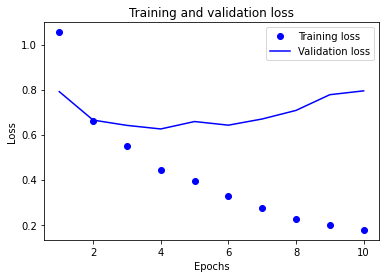

In [102]:
# train & val 손실 확인하기

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

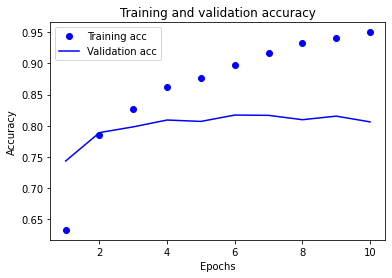

In [103]:
# train & val 정확도 확인하기

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show();

### **LSTM+LSTM / 임베딩차원 = 128 / 배치사이즈 = 256**

In [108]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.3, recurrent_dropout=0.3, return_sequences=True))
model.add(LSTM(128, dropout=0.3, recurrent_dropout=0.3))
model.add(Dense(9, activation='softmax'))

adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=adam, 
              metrics=['accuracy'])

model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_20 (Embedding)    (None, None, 128)         1280000   
                                                                 
 lstm_20 (LSTM)              (None, None, 128)         131584    
                                                                 
 lstm_21 (LSTM)              (None, 128)               131584    
                                                                 
 dense_20 (Dense)            (None, 9)                 1161      
                                                                 
Total params: 1,544,329
Trainable params: 1,544,329
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [105]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-lstm.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=6, restore_best_weights=True)
history = model.fit(train_seq_matrix, y_train, epochs=20, batch_size=256, validation_split=0.2, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
63/63 [==============================] - 180s 3s/step - loss: 1.3854 - accuracy: 0.5246 - val_loss: 1.0914 - val_accuracy: 0.5746
Epoch 2/20
63/63 [==============================] - 161s 3s/step - loss: 0.9298 - accuracy: 0.6639 - val_loss: 0.7950 - val_accuracy: 0.7468
Epoch 3/20
63/63 [==============================] - 160s 3s/step - loss: 0.6295 - accuracy: 0.7920 - val_loss: 0.6753 - val_accuracy: 0.7861
Epoch 4/20
63/63 [==============================] - 160s 3s/step - loss: 0.5089 - accuracy: 0.8365 - val_loss: 0.6849 - val_accuracy: 0.7843
Epoch 5/20
63/63 [==============================] - 160s 3s/step - loss: 0.4325 - accuracy: 0.8608 - val_loss: 0.6623 - val_accuracy: 0.7965
Epoch 6/20
63/63 [==============================] - 160s 3s/step - loss: 0.3788 - accuracy: 0.8807 - val_loss: 0.6847 - val_accuracy: 0.7975
Epoch 7/20
63/63 [==============================] - 159s 3s/step - loss: 0.3403 - accuracy: 0.8936 - val_loss: 0.7152 - val_accuracy: 0.7928
Epoch 8/20
63

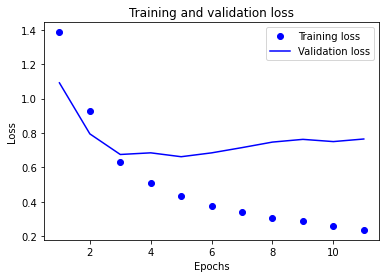

In [106]:
# train & val 손실 확인하기

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

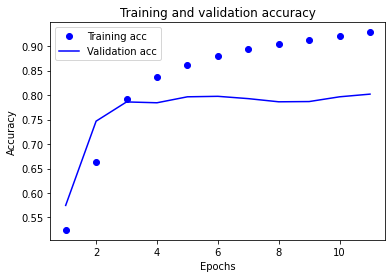

In [107]:
# train & val 정확도 확인하기

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show();

### **LSTM+LSTM / 임베딩차원 = 128 / 배치사이즈 = 128**

In [109]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-lstm.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=6, restore_best_weights=True)
history = model.fit(train_seq_matrix, y_train, epochs=20, batch_size=128, validation_split=0.2, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
126/126 [==============================] - 193s 1s/step - loss: 1.2328 - accuracy: 0.5693 - val_loss: 0.9703 - val_accuracy: 0.6622
Epoch 2/20
126/126 [==============================] - 173s 1s/step - loss: 0.7452 - accuracy: 0.7470 - val_loss: 0.7124 - val_accuracy: 0.7674
Epoch 3/20
126/126 [==============================] - 173s 1s/step - loss: 0.5610 - accuracy: 0.8149 - val_loss: 0.6456 - val_accuracy: 0.7978
Epoch 4/20
126/126 [==============================] - 173s 1s/step - loss: 0.4780 - accuracy: 0.8438 - val_loss: 0.6518 - val_accuracy: 0.7963
Epoch 5/20
126/126 [==============================] - 173s 1s/step - loss: 0.4107 - accuracy: 0.8669 - val_loss: 0.6572 - val_accuracy: 0.7948
Epoch 6/20
126/126 [==============================] - 173s 1s/step - loss: 0.3681 - accuracy: 0.8829 - val_loss: 0.6774 - val_accuracy: 0.7955
Epoch 7/20
126/126 [==============================] - 173s 1s/step - loss: 0.3207 - accuracy: 0.9008 - val_loss: 0.6765 - val_accuracy: 0.8015

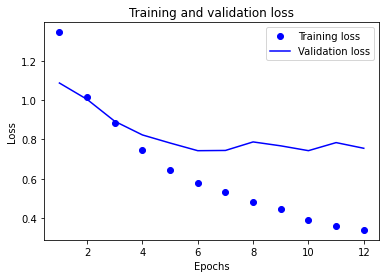

In [ ]:
# train & val 손실 확인하기

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

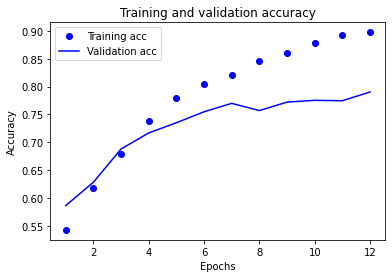

In [ ]:
# train & val 정확도 확인하기

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show();

In [ ]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-lstm.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=6, restore_best_weights=True)
history = model.fit(train_seq_matrix, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
126/126 [==============================] - 104s 801ms/step - loss: 1.2568 - accuracy: 0.5692 - val_loss: 0.9969 - val_accuracy: 0.6373
Epoch 2/20
126/126 [==============================] - 100s 796ms/step - loss: 0.7544 - accuracy: 0.7458 - val_loss: 0.7265 - val_accuracy: 0.7612
Epoch 3/20
126/126 [==============================] - 103s 807ms/step - loss: 0.5711 - accuracy: 0.8164 - val_loss: 0.6858 - val_accuracy: 0.7811
Epoch 4/20
126/126 [==============================] - 99s 789ms/step - loss: 0.4982 - accuracy: 0.8438 - val_loss: 0.6535 - val_accuracy: 0.8022
Epoch 5/20
126/126 [==============================] - 100s 793ms/step - loss: 0.4304 - accuracy: 0.8650 - val_loss: 0.7238 - val_accuracy: 0.7918
Epoch 6/20
126/126 [==============================] - 103s 818ms/step - loss: 0.3857 - accuracy: 0.8780 - val_loss: 0.6455 - val_accuracy: 0.8154
Epoch 7/20
126/126 [==============================] - 110s 872ms/step - loss: 0.3226 - accuracy: 0.8990 - val_loss: 0.6519 - 

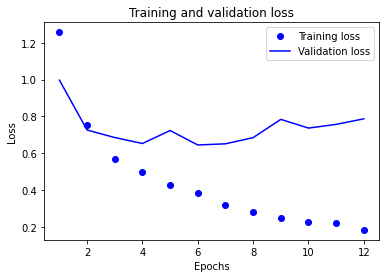

In [ ]:
# train & val 손실 확인하기

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

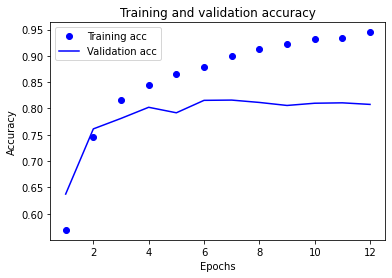

In [ ]:
# train & val 정확도 확인하기

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show();

### **테스트 데이터 평가**

In [36]:
best_model = tf.keras.models.load_model('best-lstm128.h5')
best_model.evaluate(test_seq_matrix, y_test)

158/158 [==============================] - 10s 57ms/step - loss: 0.6655 - accuracy: 0.8056


[0.6654688715934753, 0.8056108355522156]